In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette("rainbow_r")
import matplotlib.style
plt.style.use('seaborn')
import sklearn.metrics as metrics
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('NBFC Loan Transaction Data.xlsx')
df.head().T

,0,1,2,3,4
AGREEMENTID,11220001,11220002,11220006,11220008,11220010
AUTHORIZATIONDATE,2010-08-29 00:00:00,2010-09-15 00:00:00,2010-11-02 00:00:00,2010-10-06 00:00:00,2010-10-26 00:00:00
BALANCE_EXCESS,0,0,0,0,0
BALANCE_TENURE,0,99,231,0,215
CITY,MUMBAI,MUMBAI,MUMBAI,THANE,MUMBAI
COMPLETED_TENURE,45,38,81,91,89
CURRENT_INTEREST_RATE,13.4219,13.7341,15.6069,11.237,14.9826
CURRENT_INTEREST_RATE_MAX,13.7341,13.7341,16.2312,13.7341,15.6069
CURRENT_INTEREST_RATE_MIN,13.4219,13.7341,15.6069,11.237,14.9826
CURRENT_INTEREST_RATE_CHANGES,1,0,2,4,2


In [3]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 20012 
The number of columns (variables) is 53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop('AGREEMENTID', axis = 1, inplace = True)
df.drop('CUSTOMERID', axis = 1, inplace = True)
df.drop('SCHEMEID', axis = 1, inplace = True)
df.drop('NPA_IN_LAST_MONTH', axis = 1, inplace = True)
df.drop('NPA_IN_CURRENT_MONTH', axis = 1, inplace = True)
df.drop('MOB', axis = 1, inplace = True)

In [7]:
df.isnull().sum()

AUTHORIZATIONDATE                        0
BALANCE_EXCESS                           0
BALANCE_TENURE                           0
CITY                                     0
COMPLETED_TENURE                         0
CURRENT_INTEREST_RATE                    0
CURRENT_INTEREST_RATE_MAX                0
CURRENT_INTEREST_RATE_MIN                0
CURRENT_INTEREST_RATE_CHANGES            0
CURRENT_TENOR                            0
DIFF_AUTH_INT_DATE                       0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN       0
DIFF_EMI_AMOUNT_MAX_MIN                 89
DIFF_ORIGINAL_CURRENT_INTEREST_RATE      0
DIFF_ORIGINAL_CURRENT_TENOR              0
DPD                                      0
DUEDAY                                   0
EMI_AMOUNT                               0
EMI_DUEAMT                               0
EMI_OS_AMOUNT                            0
EMI_RECEIVED_AMT                         0
EXCESS_ADJUSTED_AMT                      0
EXCESS_AVAILABLE                         0
FOIR       

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(19765, 47)

In [10]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
BALANCE_EXCESS,19765.0,78401.55,1349202.94,0.00,0.00,0.00,64.05,7.555600e+07
BALANCE_TENURE,19765.0,173.29,63.70,0.00,136.00,174.00,216.00,6.740000e+02
COMPLETED_TENURE,19765.0,17.31,16.45,0.00,6.00,12.00,25.00,9.800000e+01
CURRENT_INTEREST_RATE,19765.0,14.79,2.48,10.43,12.80,14.55,16.23,2.510000e+01
CURRENT_INTEREST_RATE_MAX,19765.0,14.90,2.48,10.43,13.11,14.67,16.54,3.746000e+01
CURRENT_INTEREST_RATE_MIN,19765.0,14.30,2.67,-5.06,12.42,13.73,16.17,2.403000e+01
CURRENT_INTEREST_RATE_CHANGES,19765.0,0.76,1.14,0.00,0.00,0.00,2.00,9.000000e+00
CURRENT_TENOR,19765.0,190.60,58.25,6.00,167.00,180.00,228.00,7.130000e+02
DIFF_AUTH_INT_DATE,19765.0,0.01,0.57,-17.00,0.00,0.00,0.00,7.000000e+01
DIFF_CURRENT_INTEREST_RATE_MAX_MIN,19765.0,0.60,0.97,0.00,0.00,0.00,1.19,2.435000e+01


In [11]:
df.FORECLOSURE.value_counts()

0    18024
1     1741
Name: FORECLOSURE, dtype: int64

Text(0.5, 1.0, 'Proportion of Foreclosed Loans')

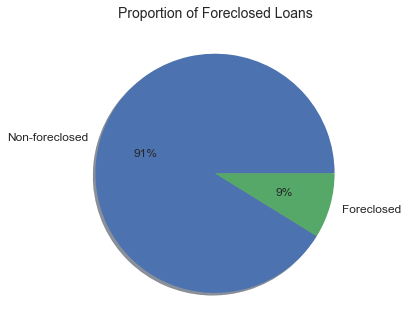

In [15]:
#colors = ['cyan','red','yellow','green','orange','blue']
#plt.figure(figsize=(5,5))
df.FORECLOSURE.value_counts(normalize=True).plot(kind='pie', 
                                                 autopct='%1.0f%%', 
                                                 #colors = colors,
                                                 shadow = True,
                                                 labels = ['Non-foreclosed','Foreclosed'],
                                                 fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Foreclosed Loans', fontsize=14)

In [62]:
df.PRODUCT.value_counts()

STHL     7208
LAP      6113
HL       3433
STLAP    3011
Name: PRODUCT, dtype: int64

Text(0.5, 1.0, 'Proportion of Product Types')

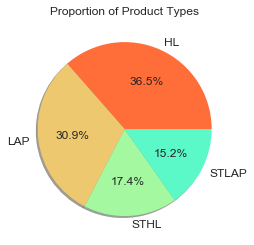

In [63]:
sizes = df['PRODUCT'].value_counts().sort_index() / df['PRODUCT'].value_counts().sum() * 100
plt.figure(figsize=(4,4))
df.PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types', fontsize = 12)

In [64]:
df[df.FORECLOSURE == 1].PRODUCT.value_counts()

HL      971
STHL    768
LAP       2
Name: PRODUCT, dtype: int64

In [66]:
sizes

HL       17.369087
LAP      30.928409
STHL     36.468505
STLAP    15.233999
Name: PRODUCT, dtype: float64

Text(0.5, 1.0, 'Proportion of Product Types - Foreclosed')

<Figure size 576x396 with 0 Axes>

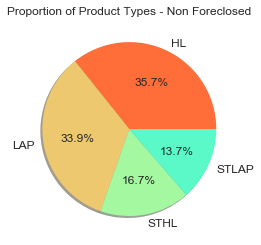

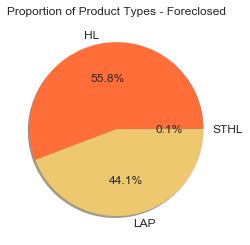

In [67]:

plt.figure(0)
plt.figure(figsize=(4,4))
df[df.FORECLOSURE == 0].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - Non Foreclosed', fontsize = 12)

plt.figure(1)
plt.figure(figsize=(4,4))
df[df.FORECLOSURE == 1].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes_1.index, shadow = True, fontsize = 12)
#df[df.FORECLOSURE == 1].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - Foreclosed', fontsize = 12)

In [48]:
sizes_1 

HL      55.772545
LAP      0.114877
STHL    44.112579
Name: PRODUCT, dtype: float64

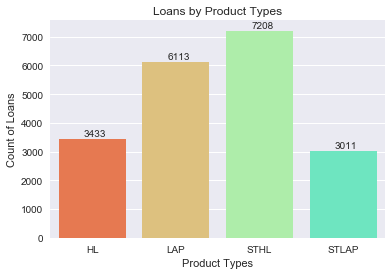

In [22]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df.PRODUCT,palette = color)
plt.title('Loans by Product Types')
plt.xlabel('Product Types')
plt.ylabel('Count of Loans')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+100))

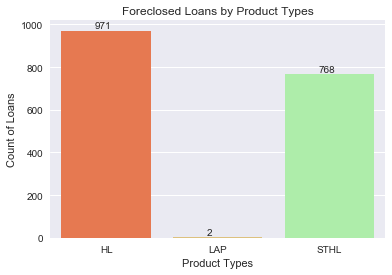

In [2927]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df[df.FORECLOSURE == 1].PRODUCT,palette = color)
plt.title('Foreclosed Loans by Product Types')
plt.xlabel('Product Types')
plt.ylabel('Count of Loans')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+10))

<Figure size 432x288 with 0 Axes>

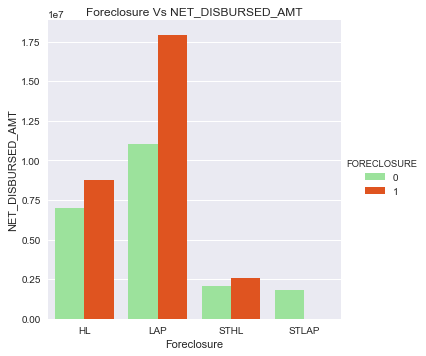

In [2928]:
plt.figure(figsize=(6,4))
ax = sns.catplot(x="PRODUCT", y="NET_DISBURSED_AMT", hue = 'FORECLOSURE', kind="bar", data=df, palette = ['lightgreen','orangered'], ci=None)
plt.title('Foreclosure Vs NET_DISBURSED_AMT')
plt.xlabel('Foreclosure')
plt.ylabel('NET_DISBURSED_AMT')
plt.show()

Text(35.07486111111112, 0.5, 'BALANCE_EXCESS')

<Figure size 432x288 with 0 Axes>

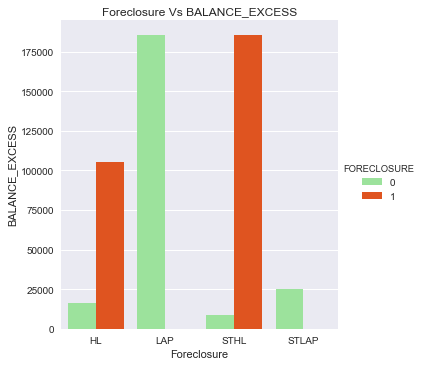

In [2929]:
plt.figure(figsize=(6,4))
ax = sns.catplot(x="PRODUCT", y="BALANCE_EXCESS", hue = 'FORECLOSURE', kind="bar", data=df, palette = ['lightgreen','orangered'], ci=None)
#ax = sns.catplot(x="FORECLOSURE", y="BALANCE_EXCESS", hue = 'PRODUCT', kind="bar", data=df, palette = colors, ci=None)
plt.title('Foreclosure Vs BALANCE_EXCESS')
plt.xlabel('Foreclosure')
plt.ylabel('BALANCE_EXCESS')

Text(35.047430555555565, 0.5, 'EXCESS_AVAILABLE')

<Figure size 432x288 with 0 Axes>

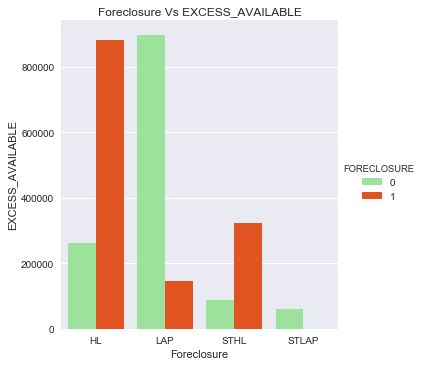

In [2930]:
plt.figure(figsize=(6,4))
ax = sns.catplot(x="PRODUCT", y="EXCESS_AVAILABLE", hue = 'FORECLOSURE', kind="bar", data=df, palette = ['lightgreen','orangered'], ci=None)
#ax = sns.catplot(x="FORECLOSURE", y="BALANCE_EXCESS", hue = 'PRODUCT', kind="bar", data=df, palette = colors, ci=None)
plt.title('Foreclosure Vs EXCESS_AVAILABLE')
plt.xlabel('Foreclosure')
plt.ylabel('EXCESS_AVAILABLE')

In [2931]:
df.CITY.value_counts()

MUMBAI         1995
HYDERABAD      1556
SURAT          1386
AHMEDABAD      1385
PUNE           1179
               ... 
MEDINIPUR         1
VYARA             1
JHAJJAR           1
PANDAVAPURA       1
DONKARAYI         1
Name: CITY, Length: 271, dtype: int64

(42.0, 0.0)

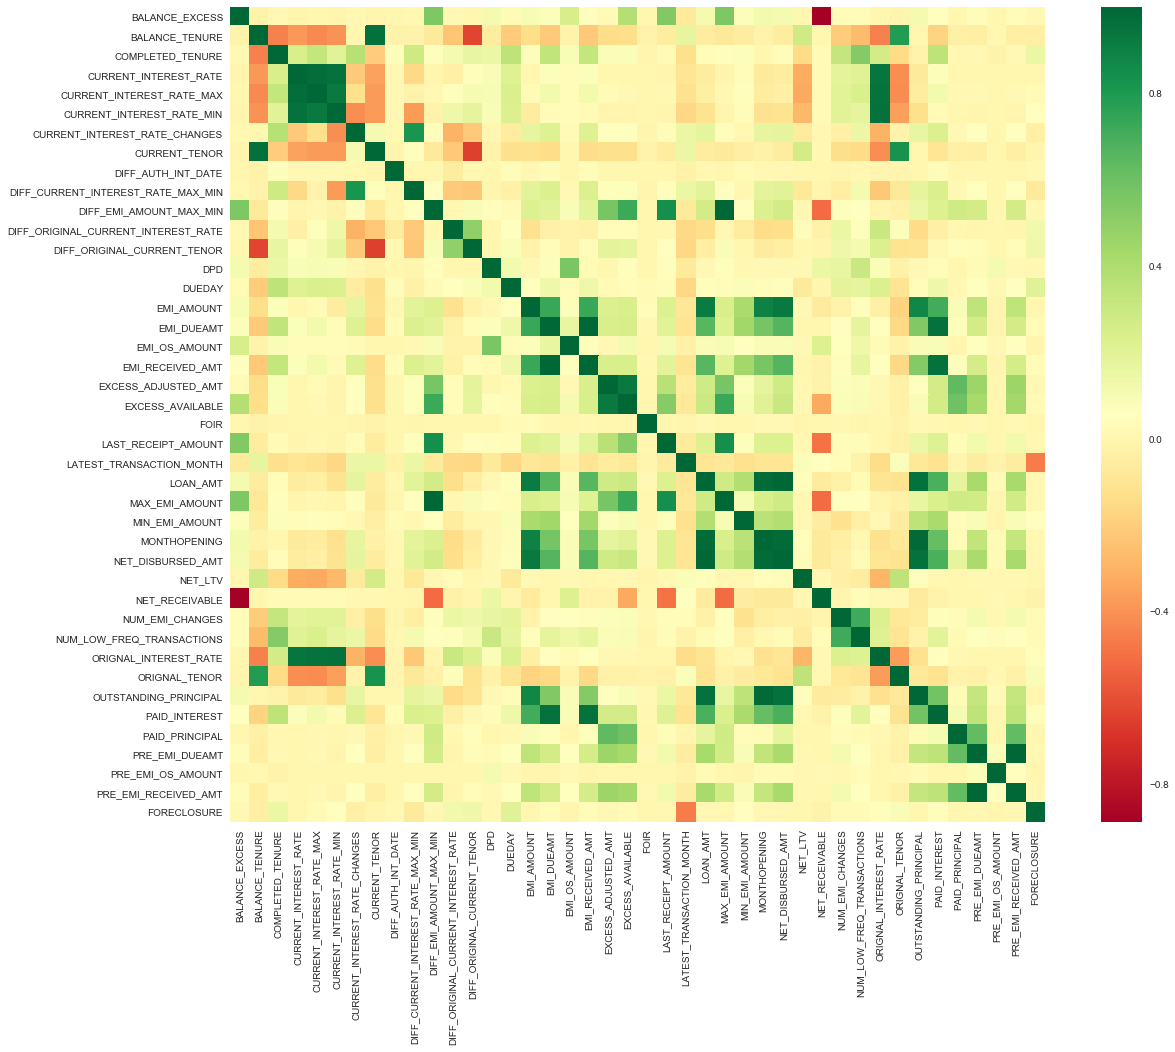

In [31]:
plt.figure(figsize=(20,15))
ax=sns.heatmap(df.corr(),cmap='RdYlGn',square=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

### 1. LOAN AMOUNT

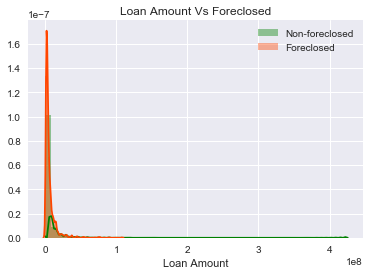

In [2933]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].LOAN_AMT, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].LOAN_AMT, label = 'Foreclosed', color = 'orangered')
ax.set_title('Loan Amount Vs Foreclosed',fontsize=12)
ax.set_xlabel('Loan Amount')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'Loan Amount to Foreclosure')

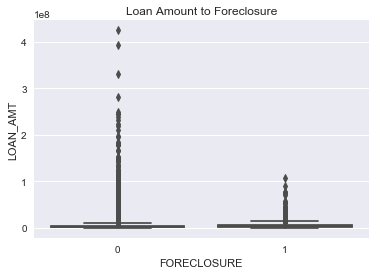

In [2934]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['LOAN_AMT'], palette = ['lightgreen','orangered'] )
plt.title('Loan Amount to Foreclosure')

### ORIGINAL TENURE

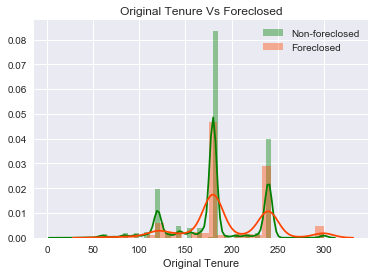

In [2935]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].ORIGNAL_TENOR, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].ORIGNAL_TENOR, label = 'Foreclosed', color = 'orangered')
ax.set_title('Original Tenure Vs Foreclosed',fontsize=12)
ax.set_xlabel('Original Tenure')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'ORIGINAL TENURE to Foreclosure')

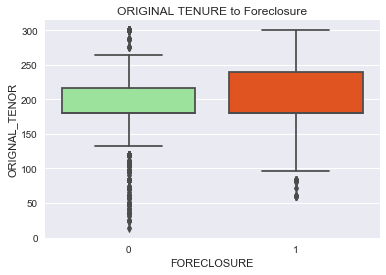

In [2936]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['ORIGNAL_TENOR'], palette = ['lightgreen','orangered'] )
plt.title('ORIGINAL TENURE to Foreclosure')

### CURRENT TENURE

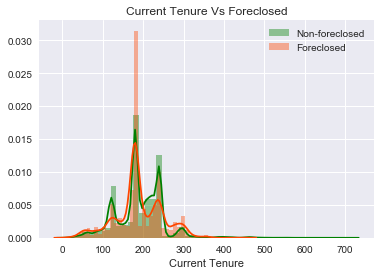

In [2937]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].CURRENT_TENOR, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].CURRENT_TENOR, label = 'Foreclosed', color = 'orangered')
ax.set_title('Current Tenure Vs Foreclosed',fontsize=12)
ax.set_xlabel('Current Tenure')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'CURRENT TENURE to Foreclosure')

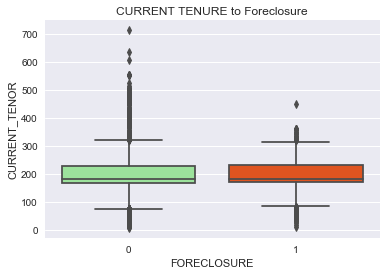

In [2938]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['CURRENT_TENOR'], palette = ['lightgreen','orangered'] )
plt.title('CURRENT TENURE to Foreclosure')

### CURRENT INTEREST RATE

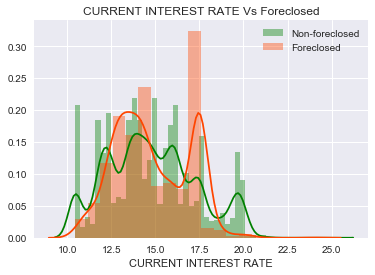

In [2939]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].CURRENT_INTEREST_RATE, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].CURRENT_INTEREST_RATE, label = 'Foreclosed', color = 'orangered')
ax.set_title('CURRENT INTEREST RATE Vs Foreclosed',fontsize=12)
ax.set_xlabel('CURRENT INTEREST RATE')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'CURRENT INTEREST RATE to Foreclosure')

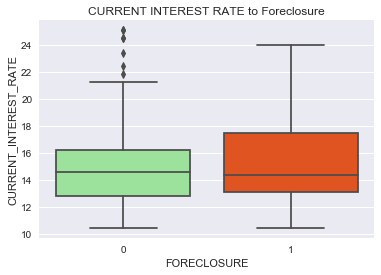

In [2940]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['CURRENT_INTEREST_RATE'], palette = ['lightgreen','orangered'] )
plt.title('CURRENT INTEREST RATE to Foreclosure')

###  EMI Amount 

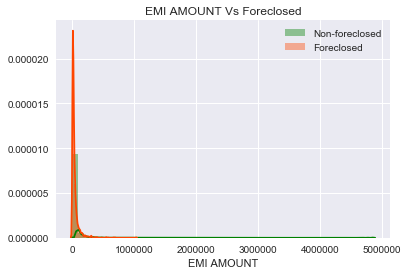

In [2941]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].EMI_AMOUNT, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].EMI_AMOUNT, label = 'Foreclosed', color = 'orangered')
ax.set_title('EMI AMOUNT Vs Foreclosed',fontsize=12)
ax.set_xlabel('EMI AMOUNT')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'EMI_AMOUNT to Foreclosure')

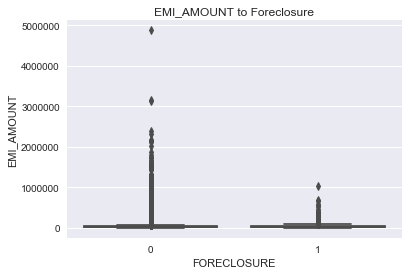

In [2942]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['EMI_AMOUNT'] , palette = ['lightgreen','orangered'])
plt.title('EMI_AMOUNT to Foreclosure')

Text(0.5, 1.0, 'Proportion of Product Types - EMI Above Rs 50000')

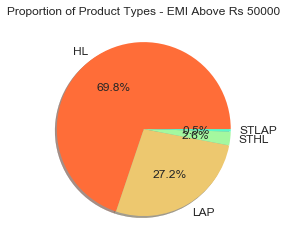

In [2943]:
plt.figure(figsize=(4,4))
df[df.EMI_AMOUNT >= 50000].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - EMI Above Rs 50000', fontsize = 12)

Text(0.5, 1.0, 'Proportion of Product Types - EMI below Rs 50000')

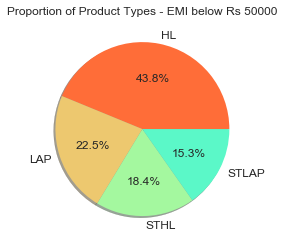

In [2944]:
plt.figure(figsize=(4,4))
df[df.EMI_AMOUNT < 50000].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - EMI below Rs 50000', fontsize = 12)

### NUM EMI CHANGES

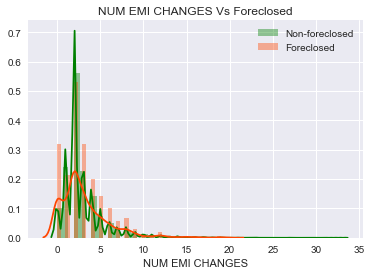

In [2945]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].NUM_EMI_CHANGES, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].NUM_EMI_CHANGES, label = 'Foreclosed', color = 'orangered')
ax.set_title('NUM EMI CHANGES Vs Foreclosed',fontsize=12)
ax.set_xlabel('NUM EMI CHANGES')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'NUM_EMI_CHANGES to Foreclosure')

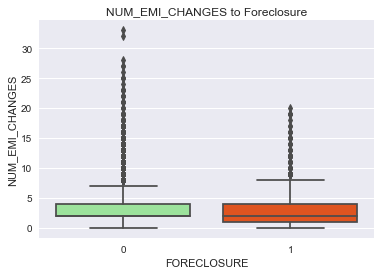

In [2946]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['NUM_EMI_CHANGES'] , palette = ['lightgreen','orangered'])
plt.title('NUM_EMI_CHANGES to Foreclosure')

### FOIR

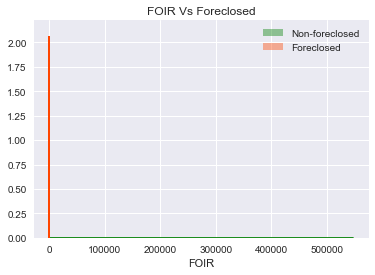

In [2947]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].FOIR, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].FOIR, label = 'Foreclosed', color = 'orangered')
ax.set_title('FOIR Vs Foreclosed',fontsize=12)
ax.set_xlabel('FOIR')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'FOIR to Foreclosure')

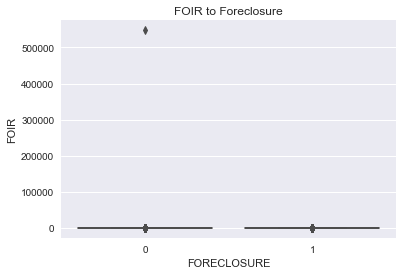

In [2948]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['FOIR'] , palette = ['lightgreen','orangered'])
plt.title('FOIR to Foreclosure')

In [2949]:
# Fixed obligation to income ratio values must be between 0 and 1. So values above 1 can be imputed to 1
df['FOIR'] = np.where(df['FOIR'] > 1, 1, df['FOIR'])
df['FOIR'] = np.where(df['FOIR'] < 0, 0, df['FOIR'])

Text(0.5, 1.0, 'FOIR to Foreclosure')

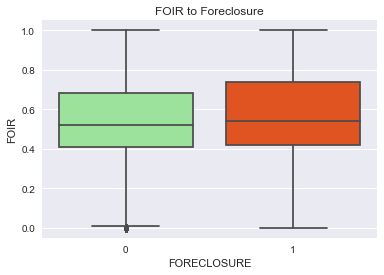

In [2950]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['FOIR'] , palette = ['lightgreen','orangered'])
plt.title('FOIR to Foreclosure')

### No of low freq transactions

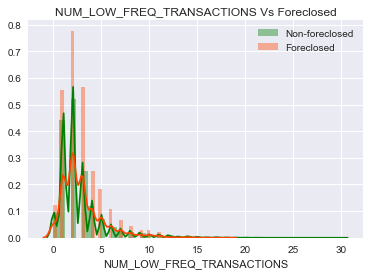

In [2951]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].NUM_LOW_FREQ_TRANSACTIONS, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].NUM_LOW_FREQ_TRANSACTIONS, label = 'Foreclosed', color = 'orangered')
ax.set_title('NUM_LOW_FREQ_TRANSACTIONS Vs Foreclosed',fontsize=12)
ax.set_xlabel('NUM_LOW_FREQ_TRANSACTIONS')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'NUM_LOW_FREQ_TRANSACTIONS to Foreclosure')

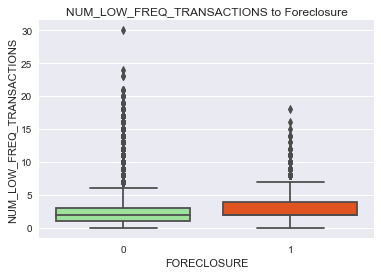

In [2952]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['NUM_LOW_FREQ_TRANSACTIONS'] , palette = ['lightgreen','orangered'])
plt.title('NUM_LOW_FREQ_TRANSACTIONS to Foreclosure')

### OUTSTANDING_PRINCIPAL

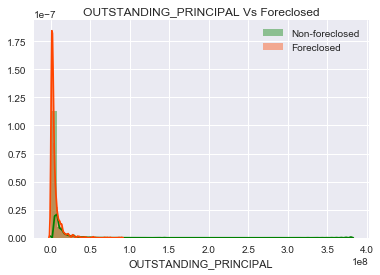

In [2953]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].OUTSTANDING_PRINCIPAL, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].OUTSTANDING_PRINCIPAL, label = 'Foreclosed', color = 'orangered')
ax.set_title('OUTSTANDING_PRINCIPAL Vs Foreclosed',fontsize=12)
ax.set_xlabel('OUTSTANDING_PRINCIPAL')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'OUTSTANDING_PRINCIPAL to Foreclosure')

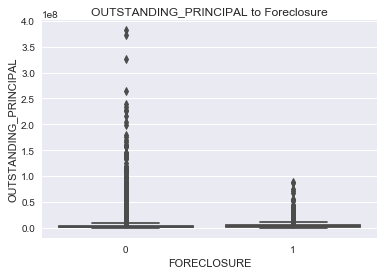

In [2954]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['OUTSTANDING_PRINCIPAL'] , palette = ['lightgreen','orangered'])
plt.title('OUTSTANDING_PRINCIPAL to Foreclosure')

### Net Loan to Value

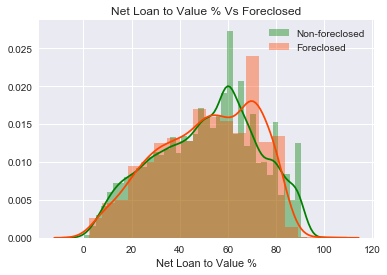

In [2955]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].NET_LTV, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].NET_LTV, label = 'Foreclosed', color = 'orangered')
ax.set_title('Net Loan to Value % Vs Foreclosed',fontsize=12)
ax.set_xlabel('Net Loan to Value %')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'NET_LTV to Foreclosure')

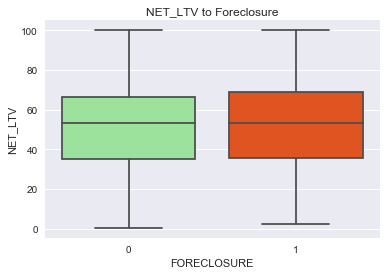

In [2956]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['NET_LTV'] , palette = ['lightgreen','orangered'])
plt.title('NET_LTV to Foreclosure')

### DPD

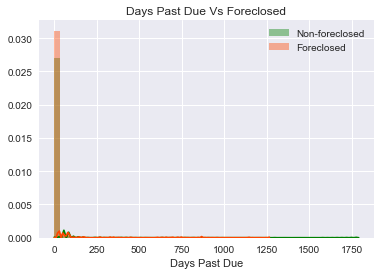

In [2957]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].DPD, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].DPD, label = 'Foreclosed', color = 'orangered')
ax.set_title('Days Past Due Vs Foreclosed',fontsize=12)
ax.set_xlabel('Days Past Due')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'DPD to Foreclosure')

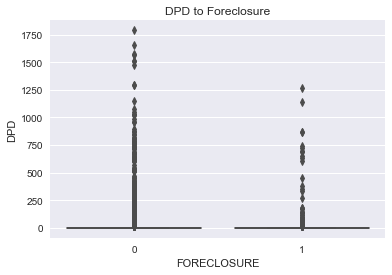

In [2958]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['DPD'] , palette = ['lightgreen','orangered'])
plt.title('DPD to Foreclosure')

In [2959]:
count = 0
for i in df.DPD : 
    if i > 0 : 
        count = count + 1

In [2960]:
print ("Number of observations with DPD above ZERO : " + str(count))

Number of observations with DPD above ZERO : 1195


In [2961]:
#939/15705

In [2962]:
#df.drop('DPD', axis = 1, inplace = True)

### EXCESS AVAILABLE

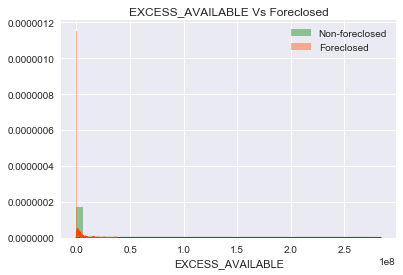

In [2963]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].EXCESS_AVAILABLE, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].EXCESS_AVAILABLE, label = 'Foreclosed', color = 'orangered')
ax.set_title('EXCESS_AVAILABLE Vs Foreclosed',fontsize=12)
ax.set_xlabel('EXCESS_AVAILABLE')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'EXCESS_AVAILABLE to Foreclosure')

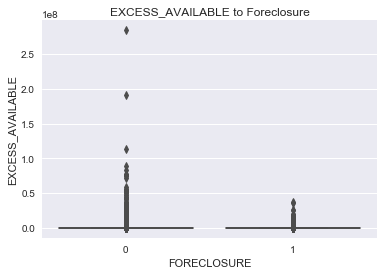

In [2964]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['EXCESS_AVAILABLE'] , palette = ['lightgreen','orangered'])
plt.title('EXCESS_AVAILABLE to Foreclosure')

### MONTH OPENING

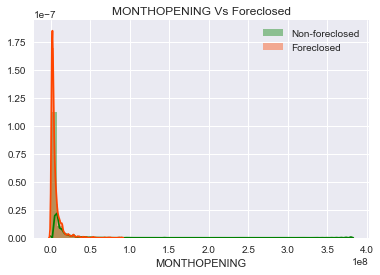

In [2965]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].MONTHOPENING, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].MONTHOPENING, label = 'Foreclosed', color = 'orangered')
ax.set_title('MONTHOPENING Vs Foreclosed',fontsize=12)
ax.set_xlabel('MONTHOPENING')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'MONTHOPENING to Foreclosure')

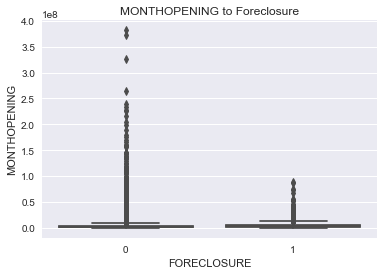

In [2966]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['MONTHOPENING'] , palette = ['lightgreen','orangered'])
plt.title('MONTHOPENING to Foreclosure')

In [2967]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19765 entries, 0 to 20011
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AUTHORIZATIONDATE                    19765 non-null  datetime64[ns]
 1   BALANCE_EXCESS                       19765 non-null  float64       
 2   BALANCE_TENURE                       19765 non-null  int64         
 3   CITY                                 19765 non-null  object        
 4   COMPLETED_TENURE                     19765 non-null  int64         
 5   CURRENT_INTEREST_RATE                19765 non-null  float64       
 6   CURRENT_INTEREST_RATE_MAX            19765 non-null  float64       
 7   CURRENT_INTEREST_RATE_MIN            19765 non-null  float64       
 8   CURRENT_INTEREST_RATE_CHANGES        19765 non-null  int64         
 9   CURRENT_TENOR                        19765 non-null  int64         
 10  DIFF_AUTH_

In [2968]:
df_final = df[['NET_DISBURSED_AMT',
               'ORIGNAL_TENOR',
               'CURRENT_TENOR', 
               'COMPLETED_TENURE',
               'ORIGNAL_INTEREST_RATE',
               'CURRENT_INTEREST_RATE',
               'CURRENT_INTEREST_RATE_MAX',
               'CURRENT_INTEREST_RATE_CHANGES',
               'DPD',
               'DUEDAY',
               'EMI_AMOUNT',
               'EMI_OS_AMOUNT', 
               'MAX_EMI_AMOUNT',
               'LAST_RECEIPT_AMOUNT',
               'EXCESS_ADJUSTED_AMT',
               'EXCESS_AVAILABLE',
               'FOIR',
               'NET_LTV',
               'NUM_EMI_CHANGES',
               'NUM_LOW_FREQ_TRANSACTIONS',
               'OUTSTANDING_PRINCIPAL',
               'PAID_INTEREST',
               'PAID_PRINCIPAL',
               'PRODUCT']]

In [2969]:
df_final['DUEDAY'] = df_final['DUEDAY'].astype('object')

(22.0, 0.0)

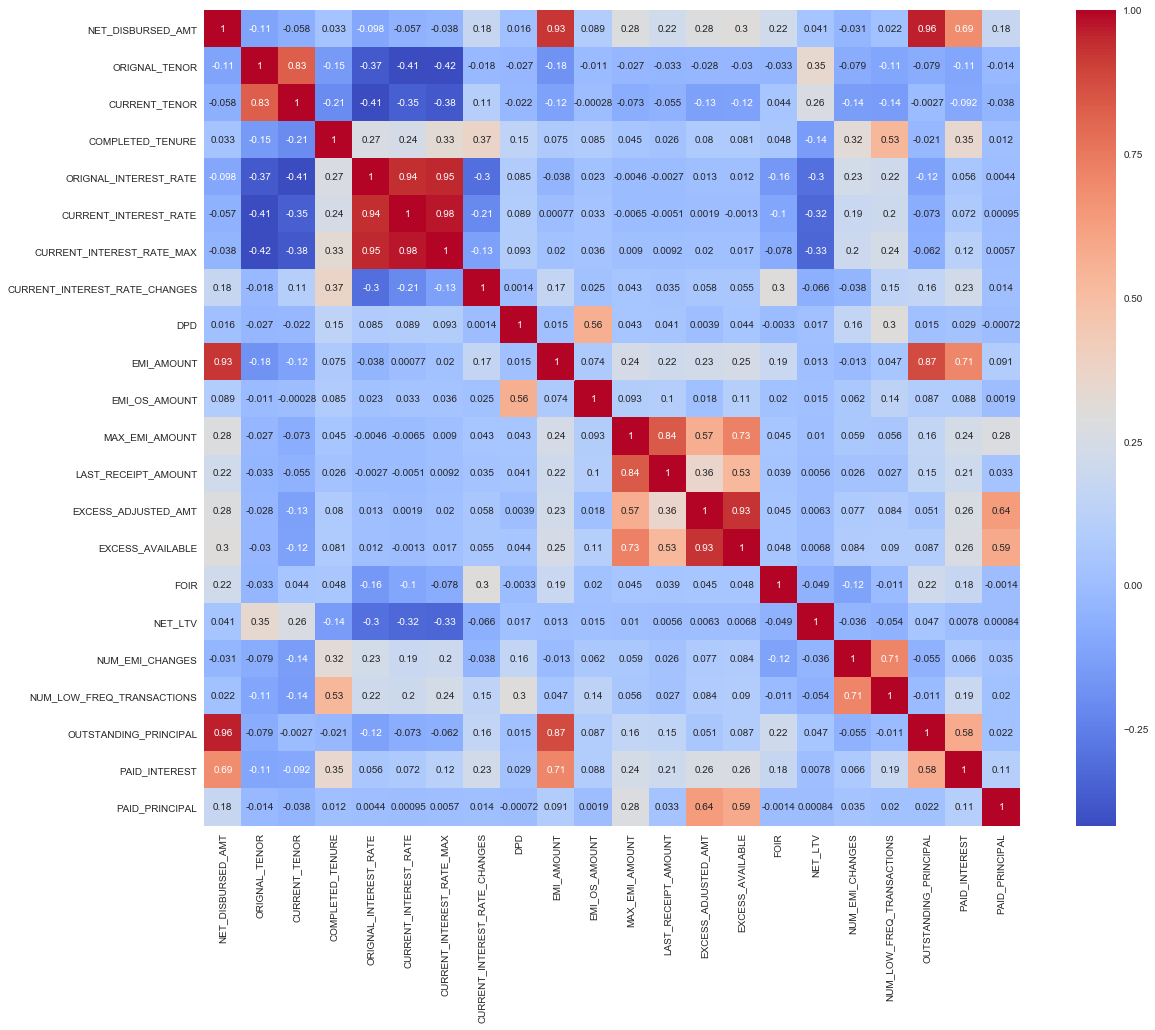

In [2970]:
plt.figure(figsize=(20,15))
ax=sns.heatmap(df_final.corr(),cmap='coolwarm',square=True, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

In [2971]:
df_final = pd.get_dummies(df_final, columns=['PRODUCT','DUEDAY'],drop_first=True)

In [2972]:
from sklearn.preprocessing import StandardScaler

In [2973]:
X = StandardScaler()

In [2974]:
scaled_df = X.fit_transform(df_final)

In [2975]:
scaled_df

array([[ 0.46276533, -1.42292854, -2.49966331, ..., -0.42393192,
        -3.34111911, -0.29119912],
       [ 1.05409655, -0.07643312, -0.92016072, ..., -0.42393192,
        -3.34111911, -0.29119912],
       [-0.14390012, -0.07643312,  2.08432791, ..., -0.42393192,
         0.29930091, -0.29119912],
       ...,
       [ 1.18889   , -1.9615267 , -1.62406948, ..., -0.42393192,
         0.29930091, -0.29119912],
       [ 4.35655733, -2.76942396, -2.24213572, ..., -0.42393192,
        -3.34111911,  3.43407633],
       [ 0.42763027, -1.42292854, -1.21202533, ..., -0.42393192,
         0.29930091, -0.29119912]])

In [2976]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df_final.columns)
scaled_df.head()

,NET_DISBURSED_AMT,ORIGNAL_TENOR,CURRENT_TENOR,COMPLETED_TENURE,ORIGNAL_INTEREST_RATE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_CHANGES,DPD,EMI_AMOUNT,...,NUM_EMI_CHANGES,NUM_LOW_FREQ_TRANSACTIONS,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRODUCT_LAP,PRODUCT_STHL,PRODUCT_STLAP,DUEDAY_5,DUEDAY_15
0,0.462765,-1.422929,-2.499663,1.683622,-1.455650,-0.549491,-0.472080,0.207980,-0.114808,0.352070,...,-0.748692,-0.691632,-0.440028,0.571604,0.308128,-0.669159,-0.757643,-0.423932,-3.341119,-0.291199
1,1.054097,-0.076433,-0.920161,1.257993,-1.455650,-0.423772,-0.472080,-0.671508,-0.114808,0.731449,...,-1.130042,-1.082631,0.625740,1.302470,0.174803,-0.669159,-0.757643,-0.423932,-3.341119,-0.291199
2,-0.143900,-0.076433,2.084328,3.872573,-1.095782,0.330543,0.535582,1.087468,-0.114808,-0.183664,...,-0.367342,0.090366,-0.189275,0.658672,0.002710,-0.669159,-0.757643,-0.423932,0.299301,-0.291199
3,0.331121,-0.076433,-1.709912,4.480615,-1.455650,-1.429524,-0.472080,2.846445,-0.114808,0.194760,...,0.014008,2.045361,-0.446432,1.204944,0.261860,-0.669159,-0.757643,-0.423932,-3.341119,-0.291199
4,0.154298,-0.076433,1.946980,4.359006,-1.335694,0.079105,0.283667,1.087468,-0.114808,0.094925,...,-1.130042,0.090366,0.177258,1.845368,-0.008296,-0.669159,-0.757643,-0.423932,0.299301,-0.291199


In [2977]:
df_final['FORECLOSURE']=df['FORECLOSURE']
scaled_df['FORECLOSURE']=df['FORECLOSURE']

## Train Test Split

In [2978]:
from sklearn.model_selection import train_test_split
X = scaled_df.drop('FORECLOSURE', axis = 1)
y = scaled_df['FORECLOSURE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
fcl_train = pd.concat([X_train, y_train], axis = 1)
fcl_test = pd.concat([X_test, y_test], axis = 1)

### Check Multicollinearity

In [2979]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [2980]:
X = scaled_df.drop('FORECLOSURE', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,NET_DISBURSED_AMT,136.004110
19,OUTSTANDING_PRINCIPAL,85.811872
6,CURRENT_INTEREST_RATE_MAX,47.699448
5,CURRENT_INTEREST_RATE,28.206492
4,ORIGNAL_INTEREST_RATE,26.082609
26,DUEDAY_15,19.328960
25,DUEDAY_5,19.268325
14,EXCESS_AVAILABLE,15.329485
13,EXCESS_ADJUSTED_AMT,13.959634
9,EMI_AMOUNT,9.747718


In [2981]:
X = X.drop('NET_DISBURSED_AMT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,CURRENT_INTEREST_RATE_MAX,47.678717
4,CURRENT_INTEREST_RATE,28.206490
3,ORIGNAL_INTEREST_RATE,26.079319
25,DUEDAY_15,19.328373
24,DUEDAY_5,19.260558
13,EXCESS_AVAILABLE,15.220076
12,EXCESS_ADJUSTED_AMT,11.219174
8,EMI_AMOUNT,6.736730
10,MAX_EMI_AMOUNT,5.837118
18,OUTSTANDING_PRINCIPAL,5.335459


In [2982]:
X = X.drop('CURRENT_INTEREST_RATE_MAX', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
24,DUEDAY_15,19.327875
23,DUEDAY_5,19.257642
3,ORIGNAL_INTEREST_RATE,15.766651
12,EXCESS_AVAILABLE,15.204014
4,CURRENT_INTEREST_RATE,13.842229
11,EXCESS_ADJUSTED_AMT,11.211557
7,EMI_AMOUNT,6.734370
9,MAX_EMI_AMOUNT,5.833667
17,OUTSTANDING_PRINCIPAL,5.335427
0,ORIGNAL_TENOR,4.890354


In [2983]:
X = X.drop('DUEDAY_15', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,ORIGNAL_INTEREST_RATE,15.763483
12,EXCESS_AVAILABLE,15.197603
4,CURRENT_INTEREST_RATE,13.831259
11,EXCESS_ADJUSTED_AMT,11.208788
7,EMI_AMOUNT,6.733647
9,MAX_EMI_AMOUNT,5.820613
17,OUTSTANDING_PRINCIPAL,5.334638
0,ORIGNAL_TENOR,4.868417
1,CURRENT_TENOR,4.637659
10,LAST_RECEIPT_AMOUNT,4.030570


In [2984]:
X = X.drop('ORIGNAL_INTEREST_RATE', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,EXCESS_AVAILABLE,15.166058
10,EXCESS_ADJUSTED_AMT,11.178460
6,EMI_AMOUNT,6.732905
8,MAX_EMI_AMOUNT,5.813499
16,OUTSTANDING_PRINCIPAL,5.334602
0,ORIGNAL_TENOR,4.387898
9,LAST_RECEIPT_AMOUNT,4.027475
1,CURRENT_TENOR,3.957829
20,PRODUCT_STHL,3.625204
21,PRODUCT_STLAP,3.578339


In [2985]:
X = X.drop('EXCESS_AVAILABLE', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,EMI_AMOUNT,6.720889
15,OUTSTANDING_PRINCIPAL,5.331219
8,MAX_EMI_AMOUNT,4.879910
0,ORIGNAL_TENOR,4.383214
9,LAST_RECEIPT_AMOUNT,3.999635
1,CURRENT_TENOR,3.954563
19,PRODUCT_STHL,3.624710
20,PRODUCT_STLAP,3.578165
14,NUM_LOW_FREQ_TRANSACTIONS,2.852470
10,EXCESS_ADJUSTED_AMT,2.787646


In [2986]:
X = X.drop('EMI_AMOUNT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,MAX_EMI_AMOUNT,4.870041
0,ORIGNAL_TENOR,4.333043
8,LAST_RECEIPT_AMOUNT,3.993562
1,CURRENT_TENOR,3.953225
18,PRODUCT_STHL,3.613737
19,PRODUCT_STLAP,3.578165
13,NUM_LOW_FREQ_TRANSACTIONS,2.852461
9,EXCESS_ADJUSTED_AMT,2.609944
17,PRODUCT_LAP,2.540492
2,COMPLETED_TENURE,2.379230


## Model 1: Logit

In [2987]:
import statsmodels.formula.api as SM

In [2988]:
f_1 = 'FORECLOSURE ~ MAX_EMI_AMOUNT + ORIGNAL_TENOR + LAST_RECEIPT_AMOUNT + CURRENT_TENOR + PRODUCT_STHL + PRODUCT_STLAP + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + NUM_EMI_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + OUTSTANDING_PRINCIPAL + DPD + EMI_OS_AMOUNT + FOIR + NET_LTV + DUEDAY_5'

In [2989]:
model_1 = SM.logit(formula = f_1, data=scaled_df).fit() #fit(method='bfgs')

         Current function value: 0.161018
         Iterations: 35


In [2990]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                19765
Model:                          Logit   Df Residuals:                    19743
Method:                           MLE   Df Model:                           21
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:                  0.4598
Time:                        22:00:56   Log-Likelihood:                -3182.5
converged:                      False   LL-Null:                       -5891.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -8.4546    156.134     -0.054      0.957    -314.472     297.563
MAX_EMI_AMOUNT                -3.117e-05      0.126     -0.000      1.000      -0.248       0.247
ORIGNAL_TENOR                     0.8071      0.058     13.869      0.000       0.693       0.921
LAST_RECEIPT_AMOUNT               0.1565      0.090      1.735      0.083      -0.020       0.333
CURRENT_TENOR                    -1.0196      0.064    -15.873      0.000      -1.146      -0.894
PRODUCT_STHL                     -1.8980      0.062    -30.499      0.000      -2.020      -1.776
PRODUCT_STLAP                    -9.1966    368.299     -0.025      0.980    -731.049     712.656
NUM_LOW_FREQ_TRANSACTIONS        -0.2467      0.051     -4.838      0.000      -0.347      -0.147
EXCESS_ADJUSTED_AMT               0.0609      0.115      0.530      0.596      -0.165       0.287
PRODUCT_LAP                      -5.5589      0.600     -9.264      0.000      -6.735      -4.383
COMPLETED_TENURE                  0.4655      0.045     10.300      0.000       0.377       0.554
CURRENT_INTEREST_RATE_CHANGES    -1.0593      0.049    -21.557      0.000      -1.156      -0.963
NUM_EMI_CHANGES                   0.0135      0.043      0.314      0.754      -0.071       0.098
CURRENT_INTEREST_RATE             1.2515      0.058     21.559      0.000       1.138       1.365
PAID_INTEREST                     0.4972      0.095      5.223      0.000       0.311       0.684
PAID_PRINCIPAL                   -4.3796      1.156     -3.789      0.000      -6.645      -2.114
OUTSTANDING_PRINCIPAL            -0.0594      0.079     -0.747      0.455      -0.215       0.096
DPD                               0.0743      0.055      1.359      0.174      -0.033       0.182
EMI_OS_AMOUNT                    -0.4079      0.219     -1.860      0.063      -0.838       0.022
FOIR                              0.1800      0.038      4.748      0.000       0.106       0.254
NET_LTV                          -0.2001      0.036     -5.612      0.000      -0.270      -0.130
DUEDAY_5                         -0.2228      0.027     -8.232      0.000      -0.276      -0.170
=================================================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [2991]:
X = X.drop('MAX_EMI_AMOUNT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,ORIGNAL_TENOR,4.330595
1,CURRENT_TENOR,3.952432
17,PRODUCT_STHL,3.612695
18,PRODUCT_STLAP,3.577890
12,NUM_LOW_FREQ_TRANSACTIONS,2.852452
16,PRODUCT_LAP,2.540092
2,COMPLETED_TENURE,2.378716
8,EXCESS_ADJUSTED_AMT,2.342257
4,CURRENT_INTEREST_RATE_CHANGES,2.318380
11,NUM_EMI_CHANGES,2.285939


In [2992]:
X = X.drop('ORIGNAL_TENOR', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
16,PRODUCT_STHL,3.592963
17,PRODUCT_STLAP,3.575173
11,NUM_LOW_FREQ_TRANSACTIONS,2.852424
15,PRODUCT_LAP,2.450771
1,COMPLETED_TENURE,2.325663
3,CURRENT_INTEREST_RATE_CHANGES,2.284920
10,NUM_EMI_CHANGES,2.283739
7,EXCESS_ADJUSTED_AMT,2.267233
2,CURRENT_INTEREST_RATE,2.211859
13,PAID_INTEREST,2.102895


In [2993]:
f_2 = 'FORECLOSURE ~ LAST_RECEIPT_AMOUNT + CURRENT_TENOR + PRODUCT_STHL + PRODUCT_STLAP + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + NUM_EMI_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + OUTSTANDING_PRINCIPAL + DPD + EMI_OS_AMOUNT + FOIR + NET_LTV + DUEDAY_5'

In [2994]:
model_2 = SM.logit(formula = f_2, data=scaled_df).fit() #fit(method='bfgs')

         Current function value: 0.166100
         Iterations: 35


In [2995]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                19765
Model:                          Logit   Df Residuals:                    19745
Method:                           MLE   Df Model:                           19
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:                  0.4428
Time:                        22:00:58   Log-Likelihood:                -3283.0
converged:                      False   LL-Null:                       -5891.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -9.7869   1.82e+04     -0.001      1.000   -3.58e+04    3.57e+04
LAST_RECEIPT_AMOUNT               0.0309      0.043      0.719      0.472      -0.053       0.115
CURRENT_TENOR                    -0.3186      0.037     -8.686      0.000      -0.391      -0.247
PRODUCT_STHL                     -1.8134      0.061    -29.716      0.000      -1.933      -1.694
PRODUCT_STLAP                   -12.5981    4.3e+04     -0.000      1.000   -8.43e+04    8.43e+04
NUM_LOW_FREQ_TRANSACTIONS        -0.2333      0.051     -4.607      0.000      -0.333      -0.134
EXCESS_ADJUSTED_AMT               0.3312      0.097      3.410      0.001       0.141       0.522
PRODUCT_LAP                      -5.5367      0.605     -9.145      0.000      -6.723      -4.350
COMPLETED_TENURE                  0.5227      0.045     11.741      0.000       0.435       0.610
CURRENT_INTEREST_RATE_CHANGES    -1.0450      0.049    -21.246      0.000      -1.141      -0.949
NUM_EMI_CHANGES                  -0.0053      0.043     -0.124      0.901      -0.090       0.079
CURRENT_INTEREST_RATE             1.1397      0.056     20.264      0.000       1.029       1.250
PAID_INTEREST                     0.4525      0.098      4.594      0.000       0.259       0.645
PAID_PRINCIPAL                   -3.9550      1.145     -3.453      0.001      -6.200      -1.710
OUTSTANDING_PRINCIPAL            -0.0730      0.077     -0.946      0.344      -0.224       0.078
DPD                               0.0785      0.055      1.440      0.150      -0.028       0.185
EMI_OS_AMOUNT                    -0.4765      0.227     -2.097      0.036      -0.922      -0.031
FOIR                              0.1601      0.037      4.354      0.000       0.088       0.232
NET_LTV                          -0.1308      0.035     -3.780      0.000      -0.199      -0.063
DUEDAY_5                         -0.2194      0.027     -8.190      0.000      -0.272      -0.167
=================================================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [2996]:
f_3 = 'FORECLOSURE ~ CURRENT_TENOR + PRODUCT_STHL + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + EMI_OS_AMOUNT + FOIR + NET_LTV + DUEDAY_5'

In [2997]:
model_3 = SM.logit(formula = f_3, data=scaled_df).fit()

Optimization terminated successfully.
         Current function value: 0.226529
         Iterations 15


In [2998]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                19765
Model:                          Logit   Df Residuals:                    19750
Method:                           MLE   Df Model:                           14
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:                  0.2401
Time:                        22:00:58   Log-Likelihood:                -4477.4
converged:                       True   LL-Null:                       -5891.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -7.6856      0.813     -9.450      0.000      -9.280      -6.092
CURRENT_TENOR                    -0.0199      0.034     -0.589      0.556      -0.086       0.046
PRODUCT_STHL                     -0.1465      0.035     -4.185      0.000      -0.215      -0.078
NUM_LOW_FREQ_TRANSACTIONS        -0.2833      0.033     -8.497      0.000      -0.349      -0.218
EXCESS_ADJUSTED_AMT               0.4788      0.089      5.374      0.000       0.304       0.653
PRODUCT_LAP                      -8.4104      1.225     -6.865      0.000     -10.811      -6.009
COMPLETED_TENURE                  0.5573      0.041     13.651      0.000       0.477       0.637
CURRENT_INTEREST_RATE_CHANGES    -0.4601      0.042    -10.845      0.000      -0.543      -0.377
CURRENT_INTEREST_RATE            -0.2345      0.035     -6.682      0.000      -0.303      -0.166
PAID_INTEREST                     0.8520      0.099      8.621      0.000       0.658       1.046
PAID_PRINCIPAL                   -4.2878      1.065     -4.026      0.000      -6.375      -2.200
EMI_OS_AMOUNT                    -0.0930      0.077     -1.202      0.229      -0.244       0.059
FOIR                              0.4281      0.033     12.786      0.000       0.362       0.494
NET_LTV                          -0.0896      0.031     -2.854      0.004      -0.151      -0.028
DUEDAY_5                         -0.3792      0.023    -16.468      0.000      -0.424      -0.334
=================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [2999]:
f_4 = 'FORECLOSURE ~ PRODUCT_STHL + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + FOIR + NET_LTV + DUEDAY_5'

In [3000]:
model_4 = SM.logit(formula = f_4, data=scaled_df).fit()

Optimization terminated successfully.
         Current function value: 0.226591
         Iterations 15


In [3001]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                19765
Model:                          Logit   Df Residuals:                    19752
Method:                           MLE   Df Model:                           12
Date:                Sun, 24 Jan 2021   Pseudo R-squ.:                  0.2398
Time:                        22:00:59   Log-Likelihood:                -4478.6
converged:                       True   LL-Null:                       -5891.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -7.6441      0.826     -9.257      0.000      -9.262      -6.026
PRODUCT_STHL                     -0.1474      0.035     -4.213      0.000      -0.216      -0.079
NUM_LOW_FREQ_TRANSACTIONS        -0.2917      0.033     -8.925      0.000      -0.356      -0.228
EXCESS_ADJUSTED_AMT               0.4730      0.091      5.197      0.000       0.295       0.651
PRODUCT_LAP                      -8.3523      1.244     -6.715      0.000     -10.790      -5.914
COMPLETED_TENURE                  0.5617      0.040     13.890      0.000       0.482       0.641
CURRENT_INTEREST_RATE_CHANGES    -0.4621      0.042    -10.920      0.000      -0.545      -0.379
CURRENT_INTEREST_RATE            -0.2298      0.034     -6.763      0.000      -0.296      -0.163
PAID_INTEREST                     0.8350      0.096      8.680      0.000       0.646       1.024
PAID_PRINCIPAL                   -4.0850      1.048     -3.897      0.000      -6.139      -2.030
FOIR                              0.4269      0.033     12.759      0.000       0.361       0.493
NET_LTV                          -0.0950      0.031     -3.076      0.002      -0.156      -0.034
DUEDAY_5                         -0.3775      0.023    -16.418      0.000      -0.423      -0.332
=================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [3002]:
y_prob_pred_train = model_4.predict(fcl_train)

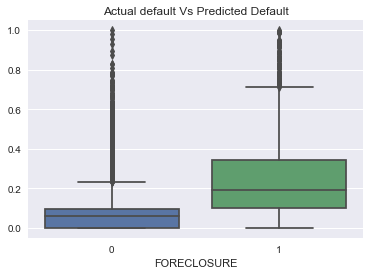

In [3003]:
plt.figure(figsize=(6,4))
sns.boxplot(x=scaled_df['FORECLOSURE'],y=y_prob_pred_train)
plt.title('Actual default Vs Predicted Default')
plt.show()

In [3004]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [3005]:
def draw_cm(actual, predicted, title):
    cm = confusion_matrix(actual, predicted, [0,1])
    plt.subplots(figsize=(4,3))
    ax = sns.heatmap(cm, cmap = 'RdYlBu', annot=True, fmt='.0f',annot_kws={"fontsize":12},
              xticklabels = ["Non-Foreclosed", "Foreclosed"],
              yticklabels = ["Non-Foreclosed", "Foreclosed"],
                    cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.yticks(rotation=0)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

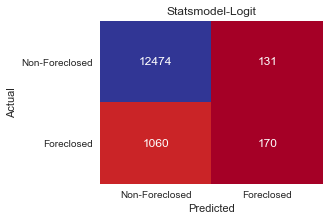

In [3006]:
draw_cm(fcl_train['FORECLOSURE'], y_class_pred, "Statsmodel-Logit")

In [3007]:
print(metrics.classification_report(fcl_train['FORECLOSURE'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.922     0.990     0.954     12605
           1      0.565     0.138     0.222      1230

    accuracy                          0.914     13835
   macro avg      0.743     0.564     0.588     13835
weighted avg      0.890     0.914     0.889     13835



In [3008]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, thresholds = roc_curve(fcl_train['FORECLOSURE'],y_prob_pred_train)

In [3009]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.11107930967053162

In [3010]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

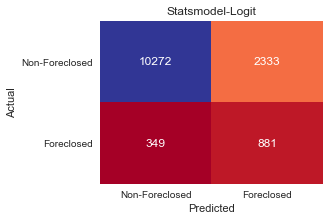

In [3011]:
draw_cm(fcl_train['FORECLOSURE'], y_class_pred, "Statsmodel-Logit")

In [3012]:
print(metrics.classification_report(fcl_train['FORECLOSURE'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.967     0.815     0.885     12605
           1      0.274     0.716     0.396      1230

    accuracy                          0.806     13835
   macro avg      0.621     0.766     0.641     13835
weighted avg      0.906     0.806     0.841     13835



### Validating on test data

In [3013]:
y_prob_pred_test = model_4.predict(fcl_test)

In [3014]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

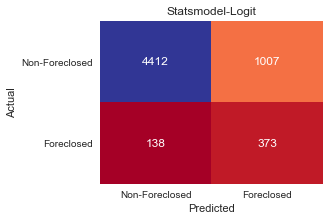

In [3015]:
draw_cm(fcl_test['FORECLOSURE'], y_class_pred, "Statsmodel-Logit")

In [3016]:
print(metrics.classification_report(fcl_test['FORECLOSURE'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.970     0.814     0.885      5419
           1      0.270     0.730     0.395       511

    accuracy                          0.807      5930
   macro avg      0.620     0.772     0.640      5930
weighted avg      0.909     0.807     0.843      5930



In [3017]:
conf_met=metrics.classification_report(fcl_test['FORECLOSURE'],y_class_pred,digits=3,output_dict=True)
met_df=pd.DataFrame(conf_met).round(2).transpose()
logit_test_precision=round(met_df.loc["1"][0],2)
logit_test_recall=round(met_df.loc["1"][1],2)
logit_test_f1=round(met_df.loc["1"][2],2)
logit_test_accu=round(met_df.loc["accuracy"][0],2)

In [3018]:
met_df

,precision,recall,f1-score,support
0,0.97,0.81,0.89,5419.00
1,0.27,0.73,0.39,511.00
accuracy,0.81,0.81,0.81,0.81
macro avg,0.62,0.77,0.64,5930.00
weighted avg,0.91,0.81,0.84,5930.00


In [3019]:
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.81
logit_test_precision  0.27
logit_test_recall  0.73
logit_test_f1  0.39


In [3020]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict(X_data)
    #probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

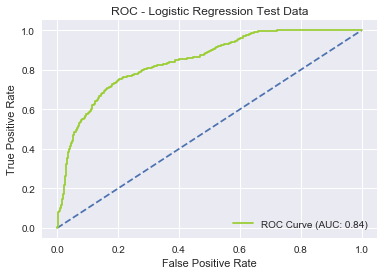

logit_test_auc 0.8445658874388838


In [3021]:
logit_test_auc, logit_test_fpr, logit_test_tpr = draw_auc_roc(model_4, X_test, y_test, 'yellowgreen', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc)

## Sklearn LogisticRegression model

In [3022]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [3023]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [3024]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

,0,1
3975,0.914621,0.085379
2223,0.999914,0.000086
3890,0.988752,0.011248
3702,0.999728,0.000272
4597,0.947708,0.052292
1961,0.999923,0.000077
4796,0.999980,0.000020
1470,0.650434,0.349566
3481,0.665559,0.334441
4547,0.983175,0.016825


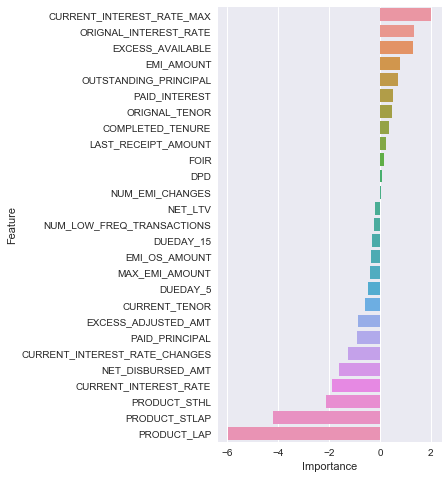

In [3025]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,8))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

In [3026]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [3027]:
def performance_matrices(model, X_data, y_data, y_predicted): 
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).round(2).transpose()
    # Keeping the performance matrices of MAJORITY class
    precision=round(met_df.loc["1"][0],2)
    recall=round(met_df.loc["1"][1],2)
    f1=round(met_df.loc["1"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [3028]:
logit_train_met,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model, X_train, y_train, ytrain_predict)
#logit_train_met_maj1,logit_train_accu_maj, logit_train_precision_maj, logit_train_recall_maj, logit_train_f1_maj = performance_matrices_maj(logit_model, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.94
logit_train_precision  0.75
logit_train_recall  0.5
logit_train_f1  0.6


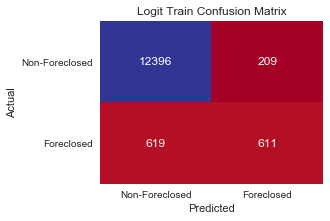

In [3029]:
draw_cm(y_train,ytrain_predict,"Logit Train Confusion Matrix")

In [3030]:
logit_test_met,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
#logit_train_met_maj1,logit_train_accu_maj, logit_train_precision_maj, logit_train_recall_maj, logit_train_f1_maj = performance_matrices_maj(logit_model, X_train, y_train, ytrain_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.94
logit_test_precision  0.71
logit_test_recall  0.47
logit_test_f1  0.56


In [3031]:
logit_test_met

,precision,recall,f1-score,support
0,0.95,0.98,0.97,5419.00
1,0.71,0.47,0.56,511.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.83,0.72,0.76,5930.00
weighted avg,0.93,0.94,0.93,5930.00


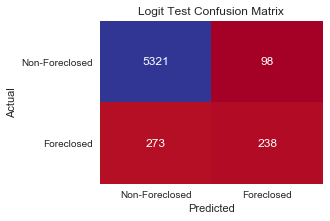

In [3032]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

In [3033]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

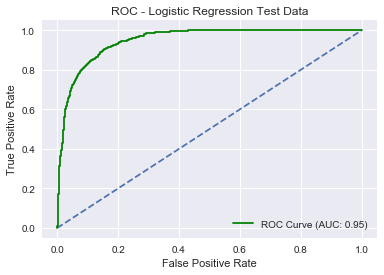

logit_test_auc 0.9485498765126255


In [3034]:
logit_test_auc1, logit_test_fpr1, logit_test_tpr1 = draw_auc_roc(logit_model, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc1)

## LDA

In [3035]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)
LDA_model

LinearDiscriminantAnalysis()

In [3036]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [3037]:
ytest_predict_prob=LDA_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.818284,0.181716
1,0.993971,0.006029
2,0.998093,0.001907
3,0.814632,0.185368
4,0.134309,0.865691
5,0.960198,0.039802
6,0.974680,0.025320
7,0.992658,0.007342
8,0.234903,0.765097
9,0.998919,0.001081


In [3038]:
LDA_train_met1,LDA_train_accu,LDA_train_precision,LDA_train_recall,LDA_train_f1 = performance_matrices(LDA_model, X_train, y_train, ytrain_predict)
#LDA_train_met_maj1,LDA_train_accu_maj,LDA_train_precision_maj,LDA_train_recall_maj,LDA_train_f1_maj = performance_matrices_maj(LDA_model, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_accu  0.94
LDA_train_precision  0.69
LDA_train_recall  0.51
LDA_train_f1  0.59


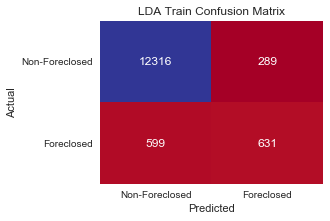

In [3039]:
draw_cm(y_train,ytrain_predict,"LDA Train Confusion Matrix")

In [3040]:
LDA_test_met1,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
#LDA_test_met_maj1,LDA_test_accu_maj,LDA_test_precision_maj,LDA_test_recall_maj,LDA_test_f1_maj = performance_matrices_maj(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.93
LDA_test_precision  0.65
LDA_test_recall  0.47
LDA_test_f1  0.55


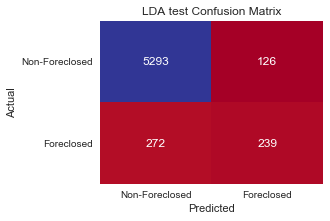

In [3041]:
draw_cm(y_test,ytest_predict,"LDA test Confusion Matrix")

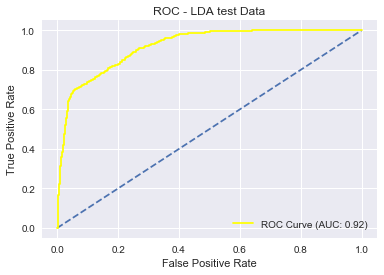

LDA_test_auc 0.9188482649112044


In [3042]:
LDA_test_auc1, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'yellow', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc1)

## KNN Model

In [3043]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [3044]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

In [3045]:
KNN_train_met1,KNN_train_accu,KNN_train_precision,KNN_train_recall,KNN_train_f1 = performance_matrices(KNN_model, X_train, y_train, ytrain_predict)
#KNN_train_met_maj1,KNN_train_accu_maj,KNN_train_precision_maj,KNN_train_recall_maj,KNN_train_f1_maj = performance_matrices_maj(KNN_model, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_accu  0.97
KNN_train_precision  0.92
KNN_train_recall  0.7
KNN_train_f1  0.8


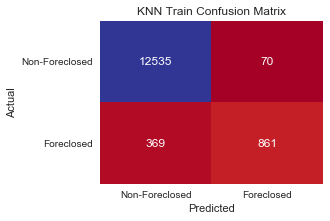

In [3046]:
draw_cm(y_train,ytrain_predict,"KNN Train Confusion Matrix")

In [3047]:
KNN_test_met1,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
#KNN_test_met_maj1,KNN_test_accu_maj,KNN_test_precision_maj,KNN_test_recall_maj,KNN_test_f1_maj = performance_matrices_maj(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.95
KNN_test_precision  0.84
KNN_test_recall  0.58
KNN_test_f1  0.69


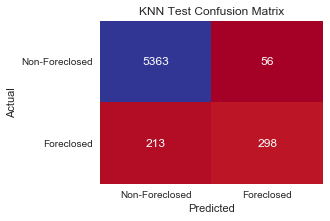

In [3048]:
draw_cm(y_test,ytest_predict,"KNN Test Confusion Matrix")

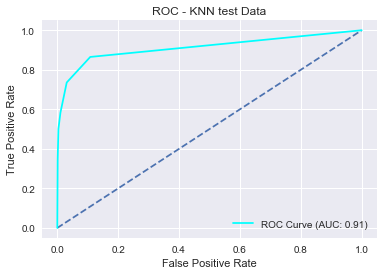

KNN_test_auc 0.9118380677683687


In [3049]:
KNN_test_auc1, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model, X_test, y_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc1)

## Naive Bayes Model

In [3050]:
from sklearn.naive_bayes import GaussianNB
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

GaussianNB()

In [3051]:
ytrain_predict = GNB_model.predict(X_train)
ytest_predict = GNB_model.predict(X_test)

In [3052]:
ytest_predict_prob=GNB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
1868,1.0,0.000000e+00
1274,1.0,2.979585e-259
1228,1.0,6.019329e-260
1318,1.0,0.000000e+00
580,1.0,6.897565e-260


In [3053]:
GNB_train_met1,GNB_train_accu,GNB_train_precision,GNB_train_recall,GNB_train_f1 = performance_matrices(GNB_model, X_train, y_train, ytrain_predict)
#MNB_train_met_maj1,MNB_train_accu_maj,MNB_train_precision_maj,MNB_train_recall_maj,MNB_train_f1_maj = performance_matrices_maj(MNB_model, X_train, y_train, ytrain_predict)
print ('GNB_train_accu ',GNB_train_accu)
print ('GNB_train_precision ',GNB_train_precision)
print ('GNB_train_recall ',GNB_train_recall)
print ('GNB_train_f1 ',GNB_train_f1)

GNB_train_accu  0.55
GNB_train_precision  0.16
GNB_train_recall  0.97
GNB_train_f1  0.28


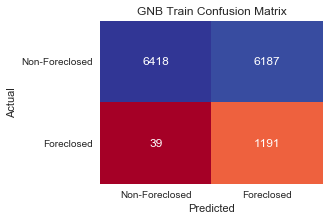

In [3054]:
draw_cm(y_train,ytrain_predict,"GNB Train Confusion Matrix")

In [3055]:
GNB_test_met1,GNB_test_accu,GNB_test_precision,GNB_test_recall,GNB_test_f1 = performance_matrices(GNB_model, X_test, y_test, ytest_predict)
print ('GNB_test_accu ',GNB_test_accu)
print ('GNB_test_precision ',GNB_test_precision)
print ('GNB_test_recall ',GNB_test_recall)
print ('GNB_test_f1 ',GNB_test_f1)

GNB_test_accu  0.55
GNB_test_precision  0.16
GNB_test_recall  0.97
GNB_test_f1  0.27


In [3056]:
GNB_test_met1

,precision,recall,f1-score,support
0,1.00,0.51,0.67,5419.00
1,0.16,0.97,0.27,511.00
accuracy,0.55,0.55,0.55,0.55
macro avg,0.58,0.74,0.47,5930.00
weighted avg,0.92,0.55,0.64,5930.00


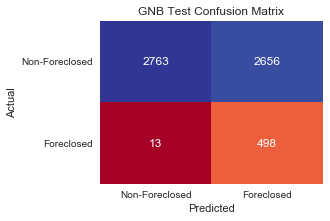

In [3057]:
draw_cm(y_test,ytest_predict,"GNB Test Confusion Matrix")

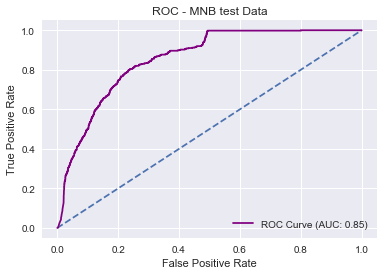

GNB_test_auc 0.854937274047356


In [3058]:
GNB_test_auc1, GNB_test_fpr, GNB_test_tpr = draw_auc_roc(GNB_model, X_test, y_test, 'purple', 'ROC - MNB test Data')
print('GNB_test_auc', GNB_test_auc1)

## SVM Model

In [3059]:
from sklearn import svm

SVM_model= svm.SVC(probability=True,random_state=1)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [3060]:
ytrain_predict = SVM_model.predict(X_train)
ytest_predict = SVM_model.predict(X_test)

In [3061]:
SVM_train_met1,SVM_train_accu,SVM_train_precision,SVM_train_recall,SVM_train_f1 = performance_matrices(SVM_model, X_train, y_train, ytrain_predict)
#SVM_train_met_maj1,SVM_train_accu_maj,SVM_train_precision_maj,SVM_train_recall_maj,SVM_train_f1_maj = performance_matrices_maj(SVM_model, X_train, y_train, ytrain_predict)
print ('SVM_train_accu ',SVM_train_accu)
print ('SVM_train_precision ',SVM_train_precision)
print ('SVM_train_recall ',SVM_train_recall)
print ('SVM_train_f1 ',SVM_train_f1)

SVM_train_accu  0.97
SVM_train_precision  0.95
SVM_train_recall  0.65
SVM_train_f1  0.77


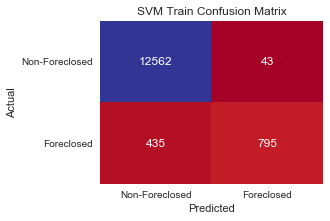

In [3062]:
draw_cm(y_train,ytrain_predict,"SVM Train Confusion Matrix")

In [3063]:
SVM_test_met1,SVM_test_accu,SVM_test_precision,SVM_test_recall,SVM_test_f1 = performance_matrices(SVM_model, X_test, y_test, ytest_predict)
#SVM_test_met_maj1,SVM_test_accu_maj,SVM_test_precision_maj,SVM_test_recall_maj,SVM_test_f1_maj = performance_matrices_maj(SVM_model, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_accu  0.96
SVM_test_precision  0.92
SVM_test_recall  0.62
SVM_test_f1  0.74


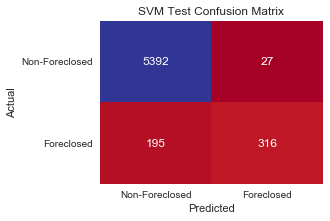

In [3064]:
draw_cm(y_test,ytest_predict,"SVM Test Confusion Matrix")

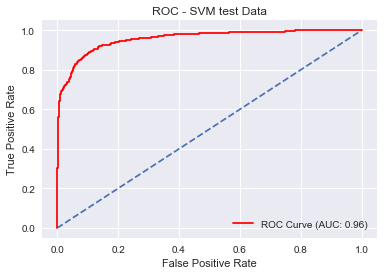

SVM_test_auc 0.9571855062404551


In [3065]:
SVM_test_auc1, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_model, X_test, y_test, 'red', 'ROC - SVM test Data')
print('SVM_test_auc', SVM_test_auc1)

## RandomForest Classifier 

In [3066]:
from sklearn.ensemble import RandomForestClassifier
RF_model= RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [3067]:
ytrain_predict = RF_model.predict(X_train)
ytest_predict = RF_model.predict(X_test)

In [3068]:
RF_train_met1,RF_train_accu,RF_train_precision,RF_train_recall,RF_train_f1 = performance_matrices(RF_model, X_train, y_train, ytrain_predict)
#RF_train_met_maj1,RF_train_accu_maj,RF_train_precision_maj,RF_train_recall_maj,RF_train_f1_maj = performance_matrices_maj(RF_model, X_train, y_train, ytrain_predict)
print ('RF_train_accu ',RF_train_accu)
print ('RF_train_precision ',RF_train_precision)
print ('RF_train_recall ',RF_train_recall)
print ('RF_train_f1 ',RF_train_f1)

RF_train_accu  1.0
RF_train_precision  1.0
RF_train_recall  1.0
RF_train_f1  1.0


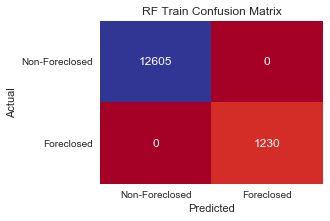

In [3069]:
draw_cm(y_train,ytrain_predict,"RF Train Confusion Matrix")

In [3070]:
RF_test_met1,RF_test_accu,RF_test_precision,RF_test_recall,RF_test_f1 = performance_matrices(RF_model, X_test, y_test, ytest_predict)
#RF_test_met_maj1,RF_test_accu_maj,RF_test_precision_maj,RF_test_recall_maj,RF_test_f1_maj = performance_matrices_maj(RF_model, X_test, y_test, ytest_predict)
print ('RF_test_accu ',RF_test_accu)
print ('RF_test_precision ',RF_test_precision)
print ('RF_test_recall ',RF_test_recall)
print ('RF_test_f1 ',RF_test_f1)

RF_test_accu  0.97
RF_test_precision  0.94
RF_test_recall  0.68
RF_test_f1  0.79


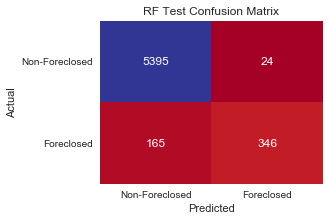

In [3071]:
draw_cm(y_test,ytest_predict,"RF Test Confusion Matrix")

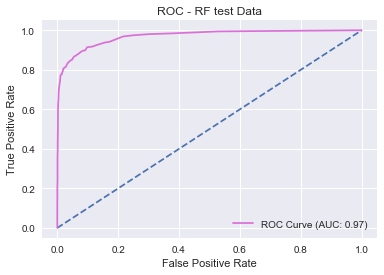

RF_test_auc 0.9696743609587055


In [3072]:
RF_test_auc1, RF_test_fpr, RF_test_tpr = draw_auc_roc(RF_model, X_test, y_test, 'orchid', 'ROC - RF test Data')
print('RF_test_auc', RF_test_auc1)

## SMOTE

In [3073]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [3074]:
print('Before SMOTE: ',X_train.shape)
print('After SMOTE: ',X_train_res.shape)

Before SMOTE:  (13835, 27)
After SMOTE:  (25210, 27)


## LogisticRegression after SMOTE 

In [3075]:
logit_res_model = LogisticRegression()
logit_res_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [3076]:
ytrain_predict = logit_res_model.predict(X_train_res)
ytest_predict = logit_res_model.predict(X_test)

In [3077]:
logit_train_met2,logit_res_train_accu,logit_res_train_precision,logit_res_train_recall,logit_res_train_f1 = performance_matrices(logit_res_model, X_train_res, y_train_res, ytrain_predict)
print ('logit_res_train_accu ',logit_res_train_accu)
print ('logit_res_train_precision ',logit_res_train_precision)
print ('logit_res_train_recall ',logit_res_train_recall)
print ('logit_res_train_f1 ',logit_res_train_f1)

logit_res_train_accu  0.88
logit_res_train_precision  0.86
logit_res_train_recall  0.9
logit_res_train_f1  0.88


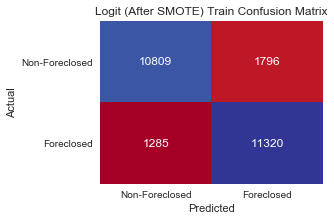

In [3078]:
draw_cm(y_train_res,ytrain_predict,"Logit (After SMOTE) Train Confusion Matrix")

In [3079]:
logit_test_met2,logit_res_test_accu,logit_res_test_precision,logit_res_test_recall,logit_res_test_f1 = performance_matrices(logit_res_model, X_test, y_test, ytest_predict)
print ('logit_res_test_accu ',logit_res_test_accu)
print ('logit_res_test_precision ',logit_res_test_precision)
print ('logit_res_test_recall ',logit_res_test_recall)
print ('logit_res_test_f1 ',logit_res_test_f1)

logit_res_test_accu  0.86
logit_res_test_precision  0.37
logit_res_test_recall  0.91
logit_res_test_f1  0.52


In [3080]:
logit_test_met2

,precision,recall,f1-score,support
0,0.99,0.85,0.92,5419.00
1,0.37,0.91,0.52,511.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.68,0.88,0.72,5930.00
weighted avg,0.94,0.86,0.88,5930.00


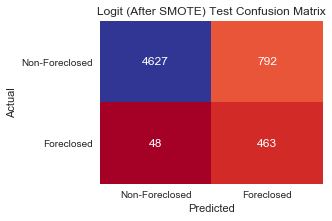

In [3081]:
draw_cm(y_test,ytest_predict,"Logit (After SMOTE) Test Confusion Matrix")

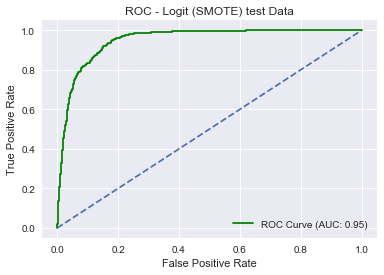

logit_res_test_auc 0.9495650044833914


In [3082]:
logit_res_test_auc, logit_res_test_fpr, logit_res_test_tpr = draw_auc_roc(logit_res_model, X_test, y_test, 'green', 'ROC - Logit (SMOTE) test Data')
print('logit_res_test_auc', logit_res_test_auc)

Text(0.5, 1.0, 'Feature Ranking - Logistic Regression')

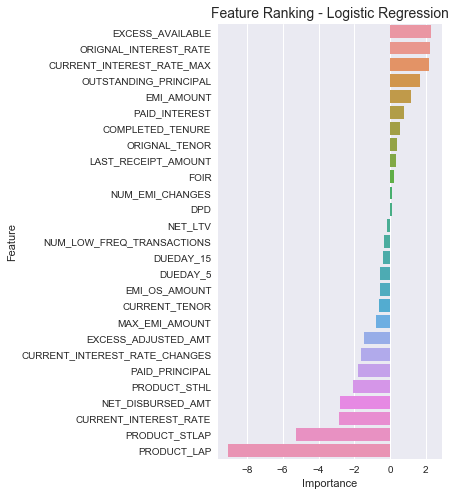

In [3083]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_res_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,8))
sns.barplot(y='Feature', x='Importance', data=feature_rank)
plt.title('Feature Ranking - Logistic Regression', fontsize = 14)

## LDA after SMOTE

In [3084]:
LDA_res_model = LinearDiscriminantAnalysis()
LDA_res_model.fit(X_train_res,y_train_res)

LinearDiscriminantAnalysis()

In [3085]:
ytrain_predict = LDA_res_model.predict(X_train_res)
ytest_predict = LDA_res_model.predict(X_test)

In [3086]:
LDA_train_met2,LDA_res_train_accu,LDA_res_train_precision,LDA_res_train_recall,LDA_res_train_f1 = performance_matrices(LDA_res_model, X_train_res, y_train_res, ytrain_predict)
print ('LDA_res_train_accu ',LDA_res_train_accu)
print ('LDA_res_train_precision ',LDA_res_train_precision)
print ('LDA_res_train_recall ',LDA_res_train_recall)
print ('LDA_res_train_f1 ',LDA_res_train_f1)

LDA_res_train_accu  0.86
LDA_res_train_precision  0.82
LDA_res_train_recall  0.92
LDA_res_train_f1  0.87


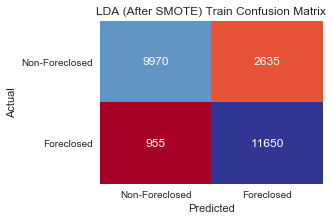

In [3087]:
draw_cm(y_train_res,ytrain_predict,"LDA (After SMOTE) Train Confusion Matrix")

In [3088]:
LDA_test_met2,LDA_res_test_accu,LDA_res_test_precision,LDA_res_test_recall,LDA_res_test_f1 = performance_matrices(LDA_res_model, X_test, y_test, ytest_predict)
print ('LDA_res_test_accu ',LDA_res_test_accu)
print ('LDA_res_test_precision ',LDA_res_test_precision)
print ('LDA_res_test_recall ',LDA_res_test_recall)
print ('LDA_res_test_f1 ',LDA_res_test_f1)

LDA_res_test_accu  0.8
LDA_res_test_precision  0.3
LDA_res_test_recall  0.93
LDA_res_test_f1  0.45


In [3089]:
LDA_test_met2

,precision,recall,f1-score,support
0,0.99,0.79,0.88,5419.0
1,0.30,0.93,0.45,511.0
accuracy,0.80,0.80,0.80,0.8
macro avg,0.64,0.86,0.67,5930.0
weighted avg,0.93,0.80,0.84,5930.0


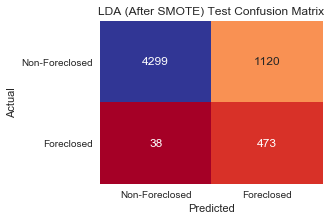

In [3090]:
draw_cm(y_test,ytest_predict,"LDA (After SMOTE) Test Confusion Matrix")

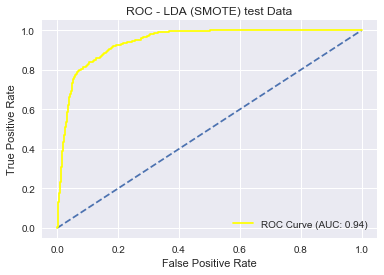

LDA_res_test_auc 0.9433456754501176


In [3091]:
LDA_res_test_auc, LDA_res_test_fpr, LDA_res_test_tpr = draw_auc_roc(LDA_res_model, X_test, y_test, 'yellow', 'ROC - LDA (SMOTE) test Data')
print('LDA_res_test_auc', LDA_res_test_auc)

## KNN after SMOTE

In [3092]:
KNN_res_model=KNeighborsClassifier()
KNN_res_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [3093]:
ytrain_predict = KNN_res_model.predict(X_train_res)
ytest_predict = KNN_res_model.predict(X_test)

In [3094]:
KNN_train_met2,KNN_res_train_accu,KNN_res_train_precision,KNN_res_train_recall,KNN_res_train_f1 = performance_matrices(KNN_res_model, X_train_res, y_train_res, ytrain_predict)
print ('KNN_res_train_accu ',KNN_res_train_accu)
print ('KNN_res_train_precision ',KNN_res_train_precision)
print ('KNN_res_train_recall ',KNN_res_train_recall)
print ('KNN_res_train_f1 ',KNN_res_train_f1)

KNN_res_train_accu  0.97
KNN_res_train_precision  0.94
KNN_res_train_recall  1.0
KNN_res_train_f1  0.97


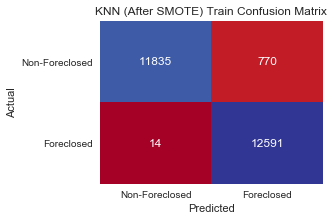

In [3095]:
draw_cm(y_train_res,ytrain_predict,"KNN (After SMOTE) Train Confusion Matrix")

In [3096]:
KNN_test_met2,KNN_res_test_accu,KNN_res_test_precision,KNN_res_test_recall,KNN_res_test_f1 = performance_matrices(KNN_res_model, X_test, y_test, ytest_predict)
print ('KNN_res_test_accu ',KNN_res_test_accu)
print ('KNN_res_test_precision ',KNN_res_test_precision)
print ('KNN_res_test_recall ',KNN_res_test_recall)
print ('KNN_res_test_f1 ',KNN_res_test_f1)

KNN_res_test_accu  0.91
KNN_res_test_precision  0.48
KNN_res_test_recall  0.83
KNN_res_test_f1  0.61


In [3097]:
KNN_test_met1

,precision,recall,f1-score,support
0,0.96,0.99,0.98,5419.00
1,0.84,0.58,0.69,511.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.90,0.79,0.83,5930.00
weighted avg,0.95,0.95,0.95,5930.00


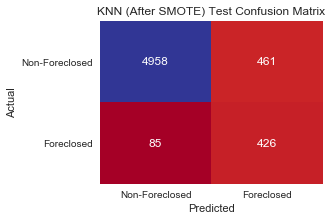

In [3098]:
draw_cm(y_test,ytest_predict,"KNN (After SMOTE) Test Confusion Matrix")

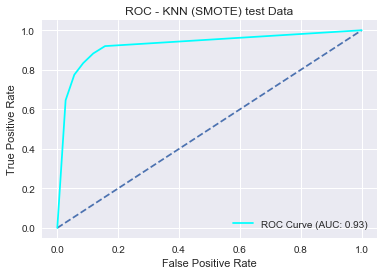

In [3099]:
KNN_res_test_auc1, KNN_res_test_fpr, KNN_res_test_tpr = draw_auc_roc(KNN_res_model, X_test, y_test, 'cyan', 'ROC - KNN (SMOTE) test Data')



## NB After SMOTE 

In [3100]:
GNB_res_model = GaussianNB()
GNB_res_model.fit(X_train_res, y_train_res)

GaussianNB()

In [3101]:
ytrain_predict = GNB_res_model.predict(X_train_res)
ytest_predict = GNB_res_model.predict(X_test)

In [3102]:
GNB_test_met2,GNB_res_test_accu,GNB_res_test_precision,GNB_res_test_recall,GNB_res_test_f1 = performance_matrices(GNB_res_model, X_test, y_test, ytest_predict)
print ('GNB_res_test_accu ',GNB_res_test_accu)
print ('GNB_res_test_precision ',GNB_res_test_precision)
print ('GNB_res_test_recall ',GNB_res_test_recall)
print ('GNB_res_test_f1 ',GNB_res_test_f1)

GNB_res_test_accu  0.55
GNB_res_test_precision  0.16
GNB_res_test_recall  0.97
GNB_res_test_f1  0.27


In [3103]:
GNB_test_met1

,precision,recall,f1-score,support
0,1.00,0.51,0.67,5419.00
1,0.16,0.97,0.27,511.00
accuracy,0.55,0.55,0.55,0.55
macro avg,0.58,0.74,0.47,5930.00
weighted avg,0.92,0.55,0.64,5930.00


## SVM after SMOTE 

In [3104]:
SVM_res_model= svm.SVC(probability=True,random_state=1)
SVM_res_model.fit(X_train_res, y_train_res)

SVC(probability=True, random_state=1)

In [3105]:
ytrain_predict = SVM_res_model.predict(X_train_res)
ytest_predict = SVM_res_model.predict(X_test)

In [3106]:
SVM_train_met2,SVM_res_train_accu,SVM_res_train_precision,SVM_res_train_recall,SVM_res_train_f1 = performance_matrices(SVM_res_model, X_train_res, y_train_res, ytrain_predict)
print ('SVM_res_train_accu ',SVM_res_train_accu)
print ('SVM_res_train_precision ',SVM_res_train_precision)
print ('SVM_res_train_recall ',SVM_res_train_recall)
print ('SVM_res_train_f1 ',SVM_res_train_f1)

SVM_res_train_accu  0.93
SVM_res_train_precision  0.92
SVM_res_train_recall  0.96
SVM_res_train_f1  0.94


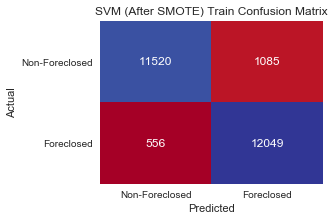

In [3107]:
draw_cm(y_train_res,ytrain_predict,"SVM (After SMOTE) Train Confusion Matrix")

In [3108]:
SVM_test_met2,SVM_res_test_accu,SVM_res_test_precision,SVM_res_test_recall,SVM_res_test_f1 = performance_matrices(SVM_res_model, X_test, y_test, ytest_predict)
print ('SVM_res_test_accu ',SVM_res_test_accu)
print ('SVM_res_test_precision ',SVM_res_test_precision)
print ('SVM_res_test_recall ',SVM_res_test_recall)
print ('SVM_res_test_f1 ',SVM_res_test_f1)

SVM_res_test_accu  0.9
SVM_res_test_precision  0.47
SVM_res_test_recall  0.87
SVM_res_test_f1  0.61


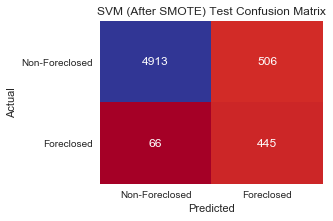

In [3109]:
draw_cm(y_test,ytest_predict,"SVM (After SMOTE) Test Confusion Matrix")

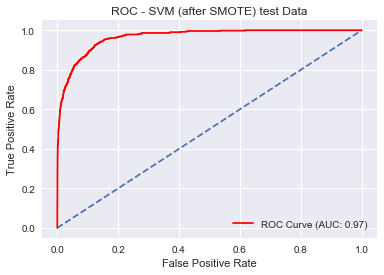

SVM_res_test_auc 0.965609334988258


In [3110]:
SVM_res_test_auc1, SVM_res_test_fpr, SVM_res_test_tpr = draw_auc_roc(SVM_res_model, X_test, y_test, 'red', 'ROC - SVM (after SMOTE) test Data')
print('SVM_res_test_auc', SVM_res_test_auc1)

## Random Forest (after SMOTE)

In [3111]:
RF_res_model= RandomForestClassifier()
RF_res_model.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [3112]:
ytrain_predict = RF_res_model.predict(X_train_res)
ytest_predict = RF_res_model.predict(X_test)

In [3113]:
RF_train_met2,RF_res_train_accu,RF_res_train_precision,RF_res_train_recall,RF_res_train_f1 = performance_matrices(RF_res_model, X_train_res, y_train_res, ytrain_predict)
print ('RF_res_train_accu ',RF_res_train_accu)
print ('RF_res_train_precision ',RF_res_train_precision)
print ('RF_res_train_recall ',RF_res_train_recall)
print ('RF_res_train_f1 ',RF_res_train_f1)

RF_res_train_accu  1.0
RF_res_train_precision  1.0
RF_res_train_recall  1.0
RF_res_train_f1  1.0


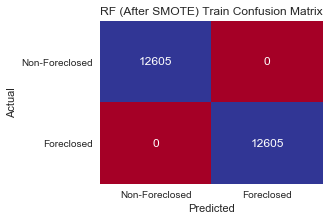

In [3114]:
draw_cm(y_train_res,ytrain_predict,"RF (After SMOTE) Train Confusion Matrix")

In [3115]:
RF_test_met2,RF_res_test_accu,RF_res_test_precision,RF_res_test_recall,RF_res_test_f1 = performance_matrices(RF_res_model, X_test, y_test, ytest_predict)
print ('RF_res_test_accu ',RF_res_test_accu)
print ('RF_res_test_precision ',RF_res_test_precision)
print ('RF_res_test_recall ',RF_res_test_recall)
print ('RF_res_test_f1 ',RF_res_test_f1)

RF_res_test_accu  0.97
RF_res_test_precision  0.8
RF_res_test_recall  0.83
RF_res_test_f1  0.81


In [3116]:
RF_test_met2

,precision,recall,f1-score,support
0,0.98,0.98,0.98,5419.00
1,0.80,0.83,0.81,511.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.89,0.91,0.90,5930.00
weighted avg,0.97,0.97,0.97,5930.00


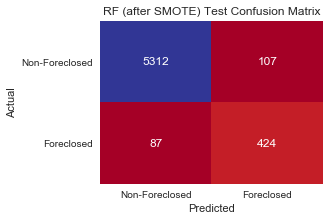

In [3117]:
draw_cm(y_test,ytest_predict,"RF (after SMOTE) Test Confusion Matrix")

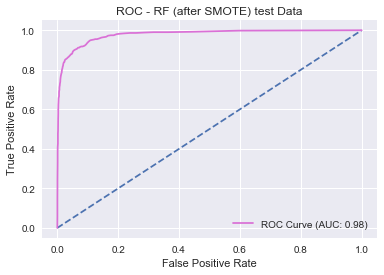

RF_res_test_auc 0.9778663461785


In [3118]:
RF_res_test_auc, RF_res_test_fpr, RF_res_test_tpr = draw_auc_roc(RF_res_model, X_test, y_test, 'orchid', 'ROC - RF (after SMOTE) test Data')
print('RF_res_test_auc', RF_res_test_auc)

Text(0.5, 1.0, 'Feature Ranking - Random Forest Classifier')

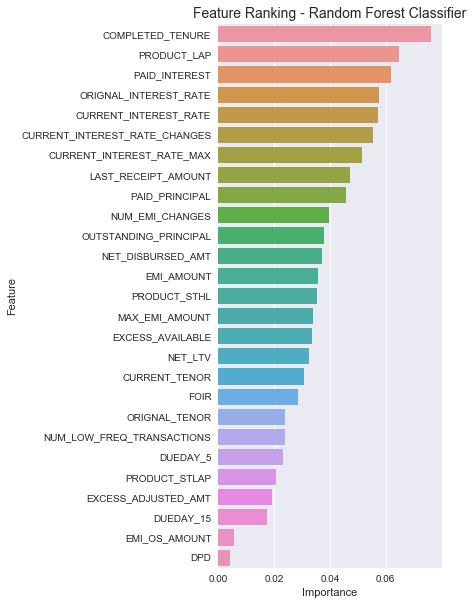

In [3119]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : RF_model.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,10))
sns.barplot(y='Feature', x='Importance', data=feature_rank)
plt.title('Feature Ranking - Random Forest Classifier', fontsize=14)

# Hyper Parameter Tuning

## LogisticRegression Tuning

In [3121]:
from sklearn.model_selection import GridSearchCV
class_weight = dict({0:1, 1:1.5})
clf = LogisticRegression(class_weight = class_weight)
grid_values = {'penalty': [ 'l2', 'none']
               ,'C':np.logspace(-1,1,20)
               ,'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga' ]
              }
logit_model3 = GridSearchCV(clf, param_grid = grid_values,cv = 10)
logit_model3.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight={0: 1, 1: 1.5}),
             param_grid={'C': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [3122]:
logit_model3.best_estimator_

LogisticRegression(C=7.847599703514611, class_weight={0: 1, 1: 1.5})

In [3123]:
#logit_model3 = LogisticRegression(C=0.1, class_weight={0: 1, 1: 1.5}, penalty='none', solver='newton-cg')
#logit_model3.fit(X_train_res, y_train_res)

In [3124]:
ytrain_predict = logit_model3.predict(X_train_res)
ytest_predict = logit_model3.predict(X_test)

In [3125]:
logit_test_met3,logit_test_accu3, logit_test_precision3, logit_test_recall3, logit_test_f13 = performance_matrices(logit_model3, X_test, y_test, ytest_predict)
#logit_test_met_maj3,logit_test_accu_maj3, logit_test_precision_maj3, logit_test_recall_maj3, logit_test_f1_maj3 = performance_matrices_maj(logit_model3, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu3)
print ('logit_test_precision ',logit_test_precision3)
print ('logit_test_recall ',logit_test_recall3)
print ('logit_test_f1 ',logit_test_f13)

logit_test_accu  0.83
logit_test_precision  0.34
logit_test_recall  0.95
logit_test_f1  0.5


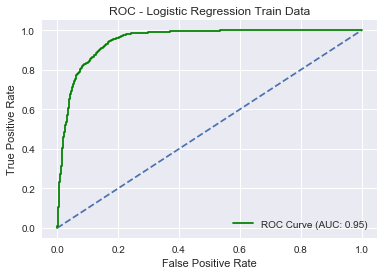

logit_test_auc 0.9504999622622294
logit_res_test_auc 0.9495650044833914


In [3126]:
logit_test_auc3, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model3, X_test, y_test, 'green', 'ROC - Logistic Regression Train Data')
print('logit_test_auc', logit_test_auc3)
print('logit_res_test_auc', logit_res_test_auc1)

In [3127]:
logit_test_met2 # Decided to use this as final Logit Model

,precision,recall,f1-score,support
0,0.99,0.85,0.92,5419.00
1,0.37,0.91,0.52,511.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.68,0.88,0.72,5930.00
weighted avg,0.94,0.86,0.88,5930.00


In [3128]:
met_df

,precision,recall,f1-score,support
0,0.97,0.81,0.89,5419.00
1,0.27,0.73,0.39,511.00
accuracy,0.81,0.81,0.81,0.81
macro avg,0.62,0.77,0.64,5930.00
weighted avg,0.91,0.81,0.84,5930.00


In [3129]:
logit_test_met

,precision,recall,f1-score,support
0,0.95,0.98,0.97,5419.00
1,0.71,0.47,0.56,511.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.83,0.72,0.76,5930.00
weighted avg,0.93,0.94,0.93,5930.00


In [3132]:
#feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model3.coef_[0]})
#feature_rank = feature_rank.sort_values('Importance', ascending=False )
#plt.figure(figsize=(4,8))
#sns.barplot(y='Feature', x='Importance', data=feature_rank)

## LDA Tuning

In [3133]:
clf = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001, 0.01]
              }
LDA_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
LDA_model3.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01]})

In [3134]:
LDA_model3.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [3135]:
ytrain_predict = LDA_model3.predict(X_train_res)
ytest_predict = LDA_model3.predict(X_test)

In [3136]:
LDA_test_met3,LDA_test_accu3,LDA_test_precision3,LDA_test_recall3,LDA_test_f13 = performance_matrices(LDA_model3, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu3)
print ('LDA_test_precision ',LDA_test_precision3)
print ('LDA_test_recall ',LDA_test_recall3)
print ('LDA_test_f1 ',LDA_test_f13)

LDA_test_accu  0.8
LDA_test_precision  0.3
LDA_test_recall  0.93
LDA_test_f1  0.45


In [3137]:
LDA_test_met2 # Use this as final model

,precision,recall,f1-score,support
0,0.99,0.79,0.88,5419.0
1,0.30,0.93,0.45,511.0
accuracy,0.80,0.80,0.80,0.8
macro avg,0.64,0.86,0.67,5930.0
weighted avg,0.93,0.80,0.84,5930.0


## KNN Model tuning

In [3138]:
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,20),
               'weights' : ['uniform'],  #['uniform','distance'],
               'metric': ['minkowski', 'euclidean', 'canberra']
              }
KNN_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 5)
KNN_model3.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 20), 'weights': ['uniform']})

In [3139]:
KNN_model3.best_params_

{'metric': 'canberra', 'n_neighbors': 6, 'weights': 'uniform'}

In [3140]:
#KNN_model3 = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 7, weights= 'distance')
#KNN_model3.fit(X_train_res, y_train_res)

In [3141]:
ytrain_predict = KNN_model3.predict(X_train_res)
ytest_predict = KNN_model3.predict(X_test)

In [3142]:
KNN_test_met3,KNN_test_accu3,KNN_test_precision3,KNN_test_recall3,KNN_test_f13 = performance_matrices(KNN_model3, X_test, y_test, ytest_predict)
#KNN_test_met_maj3,KNN_test_accu_maj3,KNN_test_precision_maj3,KNN_test_recall_maj3,KNN_test_f1_maj3 = performance_matrices_maj(KNN_model3, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu3)
print ('KNN_test_precision ',KNN_test_precision3)
print ('KNN_test_recall ',KNN_test_recall3)
print ('KNN_test_f1 ',KNN_test_f13)

KNN_test_accu  0.93
KNN_test_precision  0.57
KNN_test_recall  0.75
KNN_test_f1  0.65


In [3143]:
KNN_test_met3

,precision,recall,f1-score,support
0,0.98,0.95,0.96,5419.00
1,0.57,0.75,0.65,511.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.77,0.85,0.80,5930.00
weighted avg,0.94,0.93,0.93,5930.00


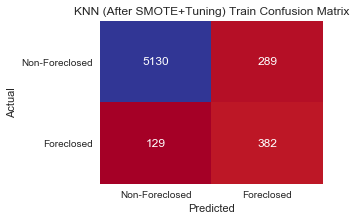

In [3144]:
draw_cm(y_test,ytest_predict,"KNN (After SMOTE+Tuning) Train Confusion Matrix")

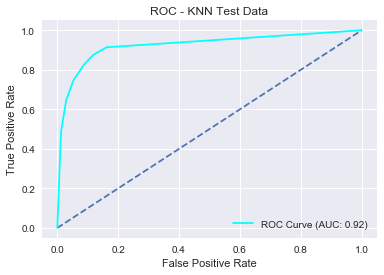

KNN_test_auc 0.923470690391747


In [3145]:
KNN_test_auc3, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model3, X_test, y_test, 'cyan', 'ROC - KNN Test Data')
print('KNN_test_auc', KNN_test_auc3)

# RandomForest Tuning

In [3146]:
param_grid = {
    'max_depth': [ 20 ], #[10,20,30]
    'max_features': [ 25 ],  #[15, 20, 25]       
    'min_samples_leaf': [ 5 ], #[3, 5, 10]
    'min_samples_split': [10 ], #[10, 20, 30]
    'n_estimators': [ 100 ] #[50, 100, 150]
}
rfcl = RandomForestClassifier(criterion='entropy', class_weight = dict({0:1, 1:10}))
RF_model3 = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [3147]:
RF_model3.fit(X_train, y_train)
#RF_model3.fit(X_train_res, y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 10},
                                              criterion='entropy'),
             param_grid={'max_depth': [20], 'max_features': [25],
                         'min_samples_leaf': [5], 'min_samples_split': [10],
                         'n_estimators': [100]})

In [3148]:
RF_model3.best_params_

{'max_depth': 20,
 'max_features': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [3149]:
ytrain_predict = RF_model3.predict(X_train)
ytest_predict = RF_model3.predict(X_test)

In [3150]:
RF_test_met3,RF_test_accu3,RF_test_precision3,RF_test_recall3,RF_test_f13 = performance_matrices(RF_model3, X_test, y_test, ytest_predict)
#RF_test_met_maj3,RF_test_accu_maj3,RF_test_precision_maj3,RF_test_recall_maj3,RF_test_f1_maj3 = performance_matrices_maj(RF_model3, X_test, y_test, ytest_predict)
print ('RF_test_accu ',RF_test_accu3)
print ('RF_test_precision ',RF_test_precision3)
print ('RF_test_recall ',RF_test_recall3)
print ('RF_test_f1 ',RF_test_f13)

RF_test_accu  0.97
RF_test_precision  0.84
RF_test_recall  0.78
RF_test_f1  0.81


In [3151]:
RF_test_met2 # Will keep this as final model

,precision,recall,f1-score,support
0,0.98,0.98,0.98,5419.00
1,0.80,0.83,0.81,511.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.89,0.91,0.90,5930.00
weighted avg,0.97,0.97,0.97,5930.00


## SVM Tuning 

In [3152]:
class_weight = dict({0:1, 1:10})
clf = svm.SVC(probability=True, class_weight = class_weight)
grid_values = {'C': np.logspace(-1,1,20),  
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
              } 
SVM_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
SVM_model3.fit(X_train, y_train) 

GridSearchCV(cv=3, estimator=SVC(class_weight={0: 1, 1: 10}, probability=True),
             param_grid={'C': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [3153]:
SVM_model3.best_params_

{'C': 10.0, 'kernel': 'rbf'}

In [3154]:
#SVM_model3 = svm.SVC(probability=True, class_weight = dict({0:1, 1:10}), C= 10.0, kernel= 'rbf')
#SVM_model3.fit(X_train, y_train)

In [3155]:
ytrain_predict = SVM_model3.predict(X_train)
ytest_predict = SVM_model3.predict(X_test)

In [3156]:
SVM_train_met3,SVM_train_accu3,SVM_train_precision3,SVM_train_recall3,SVM_train_f13 = performance_matrices(SVM_model3, X_train, y_train, ytrain_predict)
print ('SVM_train_accu ',SVM_train_accu3)
print ('SVM_train_precision ',SVM_train_precision3)
print ('SVM_train_recall ',SVM_train_recall3)
print ('SVM_train_f1 ',SVM_train_f13)

SVM_train_accu  0.93
SVM_train_precision  0.56
SVM_train_recall  0.96
SVM_train_f1  0.71


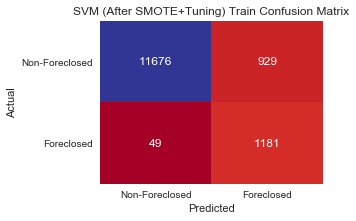

In [3157]:
draw_cm(y_train,ytrain_predict,"SVM (After SMOTE+Tuning) Train Confusion Matrix")

In [3158]:
SVM_test_met3,SVM_test_accu3,SVM_test_precision3,SVM_test_recall3,SVM_test_f13 = performance_matrices(SVM_model3, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu3)
print ('SVM_test_precision ',SVM_test_precision3)
print ('SVM_test_recall ',SVM_test_recall3)
print ('SVM_test_f1 ',SVM_test_f13)

SVM_test_accu  0.92
SVM_test_precision  0.51
SVM_test_recall  0.87
SVM_test_f1  0.64


In [3159]:
SVM_test_met3

,precision,recall,f1-score,support
0,0.99,0.92,0.95,5419.00
1,0.51,0.87,0.64,511.00
accuracy,0.92,0.92,0.92,0.92
macro avg,0.75,0.90,0.80,5930.00
weighted avg,0.95,0.92,0.93,5930.00


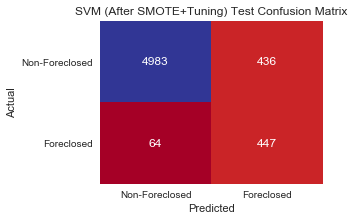

In [3160]:
draw_cm(y_test ,ytest_predict,"SVM (After SMOTE+Tuning) Test Confusion Matrix")

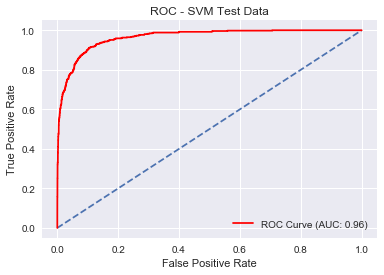

SVM_test_auc 0.9646301391530633


In [3161]:
SVM_test_auc3, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_model3, X_test, y_test, 'red', 'ROC - SVM Test Data')
print('SVM_test_auc', SVM_test_auc3)

## Bagging using RF

In [3162]:
from sklearn.ensemble import BaggingClassifier

class_weight = dict({0:1, 1:10})
rfcl = RandomForestClassifier(class_weight=class_weight,
                              max_depth = 20, 
                              max_features = 25,
                              min_samples_leaf=5,
                              min_samples_split=10)
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=1)
Bagging_model.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight={0: 1,
                                                                      1: 10},
                                                        max_depth=20,
                                                        max_features=25,
                                                        min_samples_leaf=5,
                                                        min_samples_split=10),
                  n_estimators=50, random_state=1)

In [3163]:
ytrain_predict = Bagging_model.predict(X_train_res)
ytest_predict = Bagging_model.predict(X_test)

In [3164]:
Bagging_met,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train_res, y_train_res, ytrain_predict)
print ('Bagging_train_accu ',Bagging_train_accu)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)

Bagging_train_accu  0.97
Bagging_train_precision  0.94
Bagging_train_recall  1.0
Bagging_train_f1  0.97


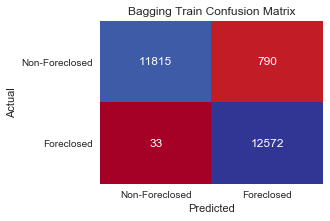

In [3165]:
draw_cm(y_train_res,ytrain_predict,"Bagging Train Confusion Matrix")

In [3166]:
Bagging_met,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.92
Bagging_test_precision  0.53
Bagging_test_recall  0.89
Bagging_test_f1  0.66


In [3167]:
Bagging_met

,precision,recall,f1-score,support
0,0.99,0.93,0.96,5419.00
1,0.53,0.89,0.66,511.00
accuracy,0.92,0.92,0.92,0.92
macro avg,0.76,0.91,0.81,5930.00
weighted avg,0.95,0.92,0.93,5930.00


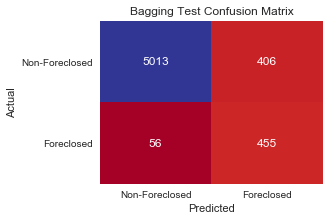

In [3168]:
draw_cm(y_test,ytest_predict,"Bagging Test Confusion Matrix")

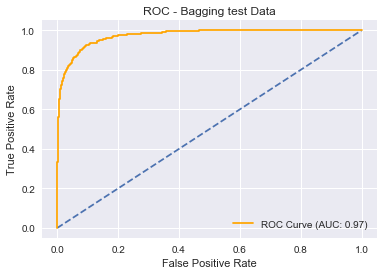

Bagging_test_auc 0.9740075237197235


In [3169]:
Bagging_test_auc, Bagging_test_fpr, Bagging_test_tpr = draw_auc_roc(Bagging_model, X_test, y_test, 'orange', 'ROC - Bagging test Data')
print('Bagging_test_auc', Bagging_test_auc)

## XG Boost 

In [3170]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.1,
                              n_estimators=100,
                              class_weight = dict({0:1, 1:10}))
XGB_model.fit(X_train, y_train)

XGBClassifier(class_weight={0: 1, 1: 10}, max_depth=5, min_child_weight=3)

In [3171]:
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = XGB_model.predict(X_test)

In [3172]:
XGB_met,XGB_train_accu,XGB_train_precision,XGB_train_recall,XGB_train_f1 = performance_matrices(XGB_model, X_train, y_train, ytrain_predict)
#XGB_met_maj,XGB_train_accu_maj,XGB_train_precision_maj,XGB_train_recall_maj,XGB_train_f1_maj = performance_matrices_maj(XGB_model, X_train, y_train, ytrain_predict)
print ('XGB_train_accu ',XGB_train_accu)
print ('XGB_train_precision ',XGB_train_precision)
print ('XGB_train_recall ',XGB_train_recall)
print ('XGB_train_f1 ',XGB_train_f1)

XGB_train_accu  0.97
XGB_train_precision  0.95
XGB_train_recall  0.75
XGB_train_f1  0.84


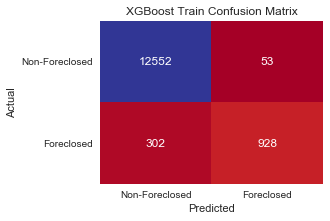

In [3173]:
draw_cm(y_train,ytrain_predict,"XGBoost Train Confusion Matrix")

In [3174]:
XGB_met,XGB_test_accu,XGB_test_precision,XGB_test_recall,XGB_test_f1 = performance_matrices(XGB_model, X_test, y_test, ytest_predict)
#XGB_met_maj,XGB_test_accu_maj,XGB_test_precision_maj,XGB_test_recall_maj,XGB_test_f1_maj = performance_matrices_maj(XGB_model, X_test, y_test, ytest_predict)
print ('XGB_test_accu ',XGB_test_accu)
print ('XGB_test_precision ',XGB_test_precision)
print ('XGB_test_recall ',XGB_test_recall)
print ('XGB_test_f1 ',XGB_test_f1)

XGB_test_accu  0.97
XGB_test_precision  0.91
XGB_test_recall  0.72
XGB_test_f1  0.8


In [3175]:
XGB_met

,precision,recall,f1-score,support
0,0.97,0.99,0.98,5419.00
1,0.91,0.72,0.80,511.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.94,0.85,0.89,5930.00
weighted avg,0.97,0.97,0.97,5930.00


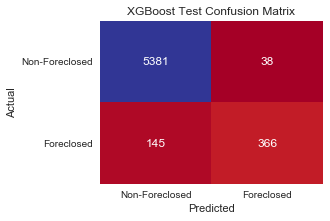

In [3176]:
draw_cm(y_test,ytest_predict,"XGBoost Test Confusion Matrix")

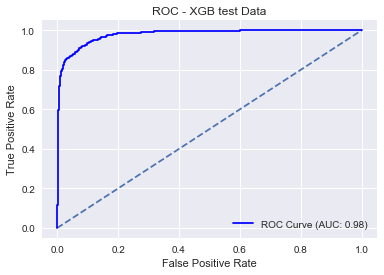

XGB_test_auc 0.9790318835408791


In [3177]:
XGB_test_auc, XGB_test_fpr, XGB_test_tpr = draw_auc_roc(XGB_model, X_test, y_test, 'blue', 'ROC - XGB test Data')
print('XGB_test_auc', XGB_test_auc)

## Lite GBM

In [3178]:
#pip install lightgbm

In [3179]:
import lightgbm as lgb
LGB_model = lgb.LGBMClassifier(class_weight = dict({0:1, 1:5}))
LGB_model.fit(X_train, y_train)

LGBMClassifier(class_weight={0: 1, 1: 5})

In [3180]:
ytrain_predict = LGB_model.predict(X_train)
ytest_predict = LGB_model.predict(X_test)

In [3181]:
LGB_met,LGB_train_accu,LGB_train_precision,LGB_train_recall,LGB_train_f1 = performance_matrices(LGB_model, X_train, y_train, ytrain_predict)
#LGB_met_maj,LGB_train_accu_maj,LGB_train_precision_maj,LGB_train_recall_maj,LGB_train_f1_maj = performance_matrices_maj(LGB_model, X_train, y_train, ytrain_predict)
print ('LGB_train_accu ',LGB_train_accu)
print ('LGB_train_precision ',LGB_train_precision)
print ('LGB_train_recall ',LGB_train_recall)
print ('LGB_train_f1 ',LGB_train_f1)

LGB_train_accu  0.99
LGB_train_precision  0.91
LGB_train_recall  0.99
LGB_train_f1  0.95


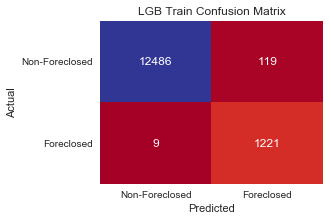

In [3182]:
draw_cm(y_train,ytrain_predict,"LGB Train Confusion Matrix")

In [3183]:
LGB_met,LGB_test_accu,LGB_test_precision,LGB_test_recall,LGB_test_f1 = performance_matrices(LGB_model, X_test, y_test, ytest_predict)
#LGB_met_maj,LGB_test_accu_maj,LGB_test_precision_maj,LGB_test_recall_maj,LGB_test_f1_maj = performance_matrices_maj(LGB_model, X_test, y_test, ytest_predict)
print ('LGB_test_accu ',LGB_test_accu)
print ('LGB_test_precision ',LGB_test_precision)
print ('LGB_test_recall ',LGB_test_recall)
print ('LGB_test_f1 ',LGB_test_f1)

LGB_test_accu  0.97
LGB_test_precision  0.8
LGB_test_recall  0.85
LGB_test_f1  0.83


In [3184]:
LGB_met

,precision,recall,f1-score,support
0,0.99,0.98,0.98,5419.00
1,0.80,0.85,0.83,511.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.89,0.91,0.90,5930.00
weighted avg,0.97,0.97,0.97,5930.00


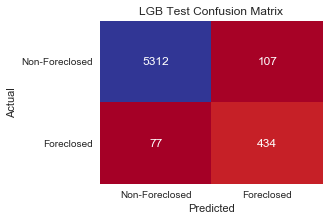

In [3185]:
draw_cm(y_test,ytest_predict,"LGB Test Confusion Matrix")

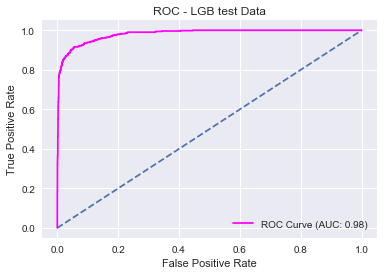

LGB_test_auc 0.981239994525315


In [3186]:
LGB_test_auc, LGB_test_fpr, LGB_test_tpr = draw_auc_roc(LGB_model, X_test, y_test, 'fuchsia', 'ROC - LGB test Data')
print('LGB_test_auc', LGB_test_auc)

Text(0.5, 1.0, 'Feature Ranking - Lite GB')

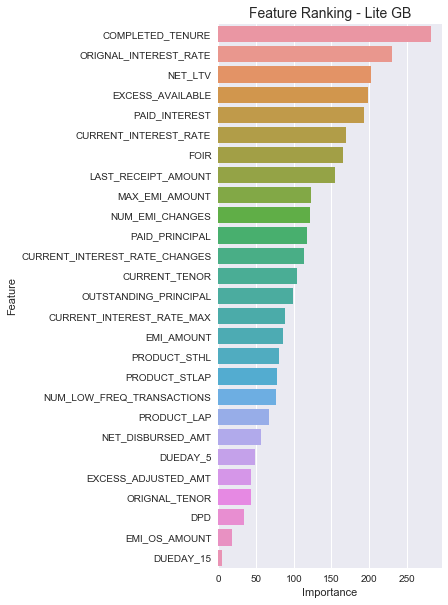

In [3187]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : LGB_model.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,10))
sns.barplot(y='Feature', x='Importance', data=feature_rank)
plt.title('Feature Ranking - Lite GB', fontsize = 14)

## Cross Validation of all final models 

In [3188]:
from sklearn.model_selection import cross_val_score

LOGIT

In [3189]:
scores = cross_val_score(logit_res_model, X_test, y_test, cv=10)
scores

array([0.94266442, 0.92580101, 0.93086003, 0.93423272, 0.94097808,
       0.93929174, 0.93254637, 0.95109612, 0.9544688 , 0.92411467])

In [3190]:
logit_test_CVmean = scores.mean()
logit_test_CVstd = scores.std()
print("Logit Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Logit Test Accuracy: 0.94 (+/- 0.01)


LDA

In [3191]:
scores = cross_val_score(LDA_res_model, X_test, y_test, cv=10)
scores

array([0.93423272, 0.93423272, 0.93086003, 0.94097808, 0.94772344,
       0.93254637, 0.93423272, 0.94435076, 0.9544688 , 0.91905565])

In [3192]:
LDA_test_CVmean = scores.mean()
LDA_test_CVstd = scores.std()
print("LDA Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

LDA Test Accuracy: 0.94 (+/- 0.01)


KNN

In [3194]:
scores = cross_val_score(KNN_model3, X_test, y_test, cv=10)
scores

array([0.9544688 , 0.94266442, 0.94940978, 0.96121417, 0.95784148,
       0.94266442, 0.96121417, 0.95615514, 0.94772344, 0.94097808])

In [3195]:
KNN_test_CVmean = scores.mean()
KNN_test_CVstd = scores.std()
print("KNN Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Test Accuracy: 0.95 (+/- 0.01)


GNB

In [3196]:
scores = cross_val_score(GNB_model, X_test, y_test, cv=10)
scores

array([0.56492411, 0.54637437, 0.5311973 , 0.57335582, 0.54806071,
       0.55986509, 0.54468803, 0.55143339, 0.52951096, 0.56155143])

In [3197]:
GNB_test_CVmean = scores.mean()
GNB_test_CVstd = scores.std()
print("GNB Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

GNB Test Accuracy: 0.55 (+/- 0.01)


SVM

In [3198]:
scores = cross_val_score(SVM_model3, X_test, y_test, cv=10)
scores

array([0.91231029, 0.91399663, 0.91568297, 0.91736931, 0.90556492,
       0.91905565, 0.90219224, 0.91905565, 0.91231029, 0.90387858])

In [3199]:
SVM_test_CVmean = scores.mean()
SVM_test_CVstd = scores.std()
print("SVM Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

SVM Test Accuracy: 0.91 (+/- 0.01)


RF

In [3200]:
scores = cross_val_score(RF_res_model, X_test, y_test, cv=10)
scores

array([0.95952782, 0.95109612, 0.95615514, 0.95278246, 0.97470489,
       0.95615514, 0.96795953, 0.95952782, 0.95952782, 0.94940978])

In [3201]:
RF_test_CVmean = scores.mean()
RF_test_CVstd = scores.std()
print("RF Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

RF Test Accuracy: 0.96 (+/- 0.01)


Bagging

In [3202]:
scores = cross_val_score(Bagging_model, X_test, y_test, cv=10)
scores

array([0.9544688 , 0.9460371 , 0.94940978, 0.94772344, 0.96290051,
       0.95615514, 0.97133221, 0.96627319, 0.96121417, 0.95278246])

In [3203]:
Bag_test_CVmean = scores.mean()
Bag_test_CVstd = scores.std()
print("Bagging Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

Bagging Test Accuracy: 0.96 (+/- 0.01)


XGBoost

In [3204]:
scores = cross_val_score(XGB_model, X_test, y_test, cv=10)
scores

array([0.96964587, 0.96290051, 0.96290051, 0.96458685, 0.97639123,
       0.96627319, 0.97976391, 0.96795953, 0.95615514, 0.95615514])

In [3205]:
XGB_test_CVmean = scores.mean()
XGB_test_CVstd = scores.std()
print("XGB Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

XGB Test Accuracy: 0.97 (+/- 0.01)


LGB

In [3206]:
scores = cross_val_score(LGB_model, X_test, y_test, cv=10)
scores

array([0.96290051, 0.96627319, 0.96121417, 0.9544688 , 0.97470489,
       0.96290051, 0.97133221, 0.96627319, 0.96290051, 0.96121417])

In [3207]:
LGB_test_CVmean = scores.mean()
LGB_test_CVstd = scores.std()
print("LGB Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

LGB Test Accuracy: 0.96 (+/- 0.01)


## Final Model Comparison 

In [3208]:
index=['Accuracy','AUC','Recall','Precision','F1 Score']
test_perf_data = pd.DataFrame({'Logit':[logit_res_test_accu,logit_res_test_auc,logit_res_test_recall,logit_res_test_precision,logit_res_test_f1],
                     'LDA':[LDA_res_test_accu,LDA_res_test_auc,LDA_res_test_recall,LDA_res_test_precision,LDA_res_test_f1],
                     'KNN':[KNN_test_accu3,KNN_test_auc3,KNN_test_recall3,KNN_test_precision3,KNN_test_f13],
                     'GNB':[GNB_test_accu,GNB_test_auc1,GNB_test_recall,GNB_test_precision,GNB_test_f1],
                     'SVM':[SVM_test_accu3,SVM_test_auc3,SVM_test_recall3,SVM_test_precision3,SVM_test_f13],
                     'RF':[RF_res_test_accu,RF_res_test_auc,RF_res_test_recall,RF_res_test_precision,RF_res_test_f1],
                     'Bag':[Bagging_test_accu,Bagging_test_auc,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1],
                     'XGB':[XGB_test_accu,XGB_test_auc,XGB_test_recall,XGB_test_precision,XGB_test_f1],
                     'LGB':[LGB_test_accu,LGB_test_auc,LGB_test_recall,LGB_test_precision,LGB_test_f1],
                     },index=index)
round(test_perf_data,2)

,Logit,LDA,KNN,GNB,SVM,RF,Bag,XGB,LGB
Accuracy,0.86,0.80,0.93,0.55,0.92,0.97,0.92,0.97,0.97
AUC,0.95,0.94,0.92,0.85,0.96,0.98,0.97,0.98,0.98
Recall,0.91,0.93,0.75,0.97,0.87,0.83,0.89,0.72,0.85
Precision,0.37,0.30,0.57,0.16,0.51,0.80,0.53,0.91,0.80
F1 Score,0.52,0.45,0.65,0.27,0.64,0.81,0.66,0.80,0.83


In [3209]:
index=['CV Mean Accuracy','CV Std Deviation']
CV_data = pd.DataFrame({'Logit':[logit_test_CVmean,logit_test_CVstd],
                     'LDA':[LDA_test_CVmean,LDA_test_CVstd],
                     'KNN':[KNN_test_CVmean,KNN_test_CVstd],
                     'GNB':[GNB_test_CVmean,GNB_test_CVstd],
                     'SVM':[SVM_test_CVmean,SVM_test_CVstd],
                     'RF':[RF_test_CVmean,RF_test_CVstd],
                     'Bag':[Bag_test_CVmean,Bag_test_CVstd],
                     'XGB':[XGB_test_CVmean,XGB_test_CVstd],
                     'LGB':[LGB_test_CVmean,LGB_test_CVstd]
                    },index=index)
round(CV_data,2)

,Logit,LDA,KNN,GNB,SVM,RF,Bag,XGB,LGB
CV Mean Accuracy,0.94,0.94,0.95,0.55,0.91,0.96,0.96,0.97,0.96
CV Std Deviation,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


NameError: name 'test_perf_data' is not defined

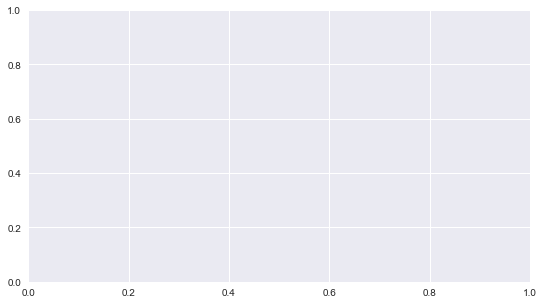

In [29]:
plt.subplots(figsize=(9,5))
ax = sns.heatmap(test_perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":11}, cbar = False)
#bottom, top = ax.get_ylim()
#ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0) 
plt.title('Model Performance Comparison', fontsize=14)

Text(0.5, 1, 'Cross Validation Scores')

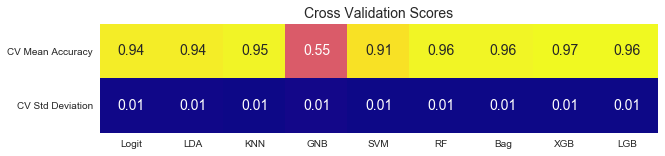

In [3211]:
plt.subplots(figsize=(10,2))
ax = sns.heatmap(CV_data, cmap='plasma', annot=True, fmt='.2f',annot_kws={"fontsize":14}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.title('Cross Validation Scores', fontsize = 14)

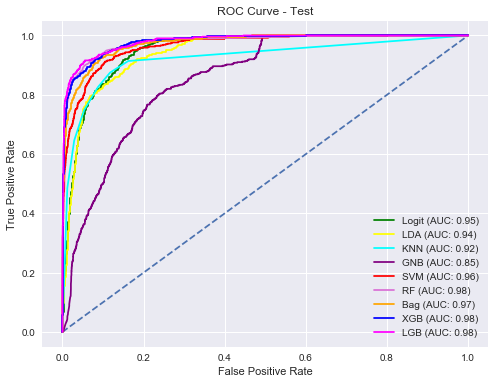

In [3212]:
plt.figure(figsize=(8,6                   
                   ))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_res_test_fpr, logit_res_test_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_res_test_auc)
plt.plot(LDA_res_test_fpr,LDA_res_test_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_res_test_auc)
plt.plot(KNN_test_fpr,KNN_test_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_test_auc3)
plt.plot(GNB_test_fpr,GNB_test_tpr,color='purple',label='GNB (AUC: %0.2f)'%GNB_test_auc1)
plt.plot(SVM_test_fpr,SVM_test_tpr,color='red',label='SVM (AUC: %0.2f)'%SVM_test_auc3)
plt.plot(RF_res_test_fpr,RF_res_test_tpr,color='orchid',label='RF (AUC: %0.2f)'%RF_res_test_auc)
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='orange',label='Bag (AUC: %0.2f)'%Bagging_test_auc)
plt.plot(XGB_test_fpr,XGB_test_tpr,color='blue',label='XGB (AUC: %0.2f)'%XGB_test_auc)
plt.plot(LGB_test_fpr,LGB_test_tpr,color='fuchsia',label='LGB (AUC: %0.2f)'%LGB_test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend(loc="lower right")